<div style ="border: blue solid 1px;
             font-family: cambria;
             box-shadow: 0px 0px 100px rgba(0, 0, 0, 0.5);
             background-image: url(1.jpg);
             height: 100%;
             width: 100%;">
<center>
<a href="#" >
    <h1> <font color="white">PROJET DE PYTHON 2A - ENSAE IP Paris</font> </h1> 
    <h2> <font color="white">Thème : Determinants des choix d'orientation des etudiants dans les etablissments d'enseignement superieur</font> </h2> 
<a href="#" >
    <img src="ensae_picture.PNG" style="float:right; max-width: 190px; display: inline" alt="ENSAE" ; height: 100%;" /></a>     
</center>
</div>

<div style ="border: blue solid 5px; font-family: cambria;font-size:20px;	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);background-color: rgba(10, 10, 0, 0.5);">
<center>
<font color="white">------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color="white"><br><h6>--------------------------SOUS LA SUPERVISION DE : ----------------------</h6> </font> 
<ul>
<h6>Mme Anne MULLER </h6>
</ul>
<font color="white"><br><h6>--------------------------REALISE PAR : ----------------------</h6> </font> 
<ul>
<h6>BAMOUNI Christophe</h6>
<h6>DIALLO Khariratou</h6>    
<h6>SOW Doulo</h6>

</ul>
<font color="white">------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font> 
</center>
    </div>

<div style ="border: red solid 2px; font-family: cambria;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);background-color: rgba(50, 50, 50, 0.5);"><font color="black"><center><h1>-- Précisions majeures  -- <br></h1> </center></font> </div>

La structure du projet, pour rendre ce notebook facilement lisible, est basé sur des appels à d'autres notebook crées. Spécifiquement, nous avons les autres notebooks nommés : <br> 
* **function.ipynb** : qui regroupe toutes les fonctions, ou plutôt la majeures parties, définies dans ce projet pour optimser les tâches ;  <br> 
* **head.ipynb** : qui regroupe tous les packages et leurs descriptions qu'on a utilisé pour mener à bien ce projet. <br>
Ainsi, la cellulle qui suit gère le paramétrage (intaller ipynb) pour pouvoir appeler directement ces packages dans celui-ci.

In [469]:
#Pour l'appel d'autre notebook
#!pip install ipynb
#Pour la présentation PowerPoint depuis NoteBook
#!pip install RISE
#Pour la table des matière intéractive (hyperlink)
#!pip install ipynb
#!pip install jyquickhelper

<div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"><center><h1>-- Chargement des packages essentiels --</h1> </center></font> </div>

In [470]:
#Appel du notebook contenant les packages
%run ./head.ipynb
#Appel du notebook contenant des fonctions définies
%run ./function.ipynb


Head : Tout est ok ! 
Function : Tout est ok ! 


<div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"><center><h1>-- TABLE DES MATIERES --</h1> </center></font> </div>

In [471]:
add_notebook_menu()

<div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"><center><h1>-- Plan du travail --</h1> </center></font> </div>

## Introduction et Présentation du projet

<p  style = "text-align: justify;  font-size : 16px;"> Ce projet entre dans le cadre de l'évaluation du cours de Python suivi en deuxième année du cycle Ingénieur de l'ENSAE Paris IP-Paris. L'objectif principal est de mettre en oeuvre les acquis du cours en essayant de répondre à une problématique au choix.
Ce présent notebook, en plus des autres auxquels il est lié est soumis avec le projet, retrace les différentes partie de notre travail qui porte sur : <br> <br>

 <div style ="border: blue solid 0.5px;font-size : 10px ; font-family: cambria; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(5, 5, 5, 0.5);"><font color="black"><center><h1>Comprendre les choix d'orientation des nouveaux bacheliers : Analyse des déterminants de l'attractivité des établissements supérieurs <br></h1> </center></font> </div>
 

<p  style = "text-align: justify;  font-size : 16px;">L'objectif principal de ce sujet est de saisir les caractéristiques qui déférencient les établissements et par ricochet déterminent les préférences que les étudiants ont face aux établissements. Il s'agira donc spécifiquement de voir d'abord les caractéristques globales qui se dégagent aux niveaux des étblissements, en ce qui concerne leurs types de filières proposées, les enseignements, la capacité d'accueil etc, et aussi en termes d'insertion dans le monde professionnel de leurs produits. Ces facteurs, sont en quelque sorte des signaux que les établissements envoient aux nouveaux bacheliers afin de pouvoir capter le maximum de candidats et ce les plus remarquables dans leur parcours. Ces dans cette ordre d'idées, que nous verrons les différentes caractéristiques des élèves qui se voient le plus proposés des admissions. Ainsi, ces caractéristiques qui porterons globalement sur les types de mentions obtenus au baccalauréat, la série suivie par l'élève, son statut boursier et entre autres, nous permettrons de voir quelques sont en quelque sorte les critères de sélectivité des établissements.
<p>
    

   ## Récupération et traitement des données
<p  style = "text-align: justify;  font-size : 16px;"> Les données utilisés dans le cadre de ce projet sont issues du 
<a href="https://data.enseignementsup-recherche.gouv.fr/pages/home/">site du Ministère de l'Enseignement supérieur, de la Recherche et de l'Innovation du gouvernement français</a>. Pour assurer la reproductibilité de ce travail, les données sont directement récupérer à travers un scraping. Nous reviendrons en détails sur cette partie, dans les lignes qui suivent. Les données obtenues à partir de ce sraping ont étaient traitées afin d'assuer leur utilisabilité et la pertinence par rapport à l'objectif recherché.
    
   ### Analyse descriptive

<p  style = "text-align: justify;  font-size : 16px;">Dans cette section, nous avons décrit les principales caractéristiques relatives aux établissements et en même temps avons passé en revue les caractéristiques des élèves qui sont souvent admis selon les filières et leur nature (sélectivité, discipline etc). Notons que dans l'analyse, il a était constaté qu'il existe des établissements qui n'ont reçu aucune demande émanant des candidats. Et donc, nous avons jugé nécessaire de faire une analyse particulière à ce groupe d'établissements afin de dégager leurs principales caractéristiques qui pourraient expliquer ce phénomène. Afin d'approfondir, cette analyse, un modèle Logit (avec comme variable dépendante : le fait que l'établissement reçoit ou non). 
<p>   
    
  ### Modélisation 
    

    

# PARTIE 1 <div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> : Récupération et traitement des données</font> </div>

Dans cette section, nous décrivons l'ensemble des étpes d'acquisition des données et décrivons le processus d'apurement de la base.

## 1.1 Importation des données<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

  
###  a. Présentation des données à récupérer 

Les données utilisées dans le projet sont formées par deux bases qui traitent de deux thématiques plus ou moins différentes mais qui concernent néanmoins les établissements. <br>

* **Les données sur les voeux émis par les candidats :**
Cette base de données (issues des données Parcoursup de la campagne 2020) nous permet d'avoir les informations relatives aux filières dispensés par l'établissement et selon chaque filière nous avons les informations sur la capacité d'accueil, les demandes faites par les candidats, les acceptations etc. En résumé, nous avons, pour chaque filière et selon l'établissement : <br>

    * La capacité d’accueil<br>
    * Le nombre de voeux reçus selon le sexe et la série du baccalauréat<br>
    * Le nombre de voeux classés par l’établissement de la formation d’accueil selon la série du baccalauréat<br>
    * Le nombre de propositions d’admission faites selon la série du baccalauréat <br>
    * Le nombre d’admis selon le sexe, la série du baccalauréat et la mention obtenue<br>
    * Le nombre de boursiers <br>
    
Des dérivés de ces données sont entre autres les pourcentages correspondants. En plus de cela, les informations qualitatives notamment le caractère sélectif de l'établissement, son statut (public, privé etc.) et son type (lycéee, université etc.) sont renseignées. Ce qui permettra de faire des analyses compratives selon les dimensions qualitatives.
* **Les données sur les voeux émis par les candidats :** 
L'un des objectif de ce travail est de pouvoir trouver les variables pertinentes pour expliquer l'attractivité des établissements. C'est dans ce but, que nous avons décider d'inclure dans l'analyse les données reltives à l'insertion des diplômés des différents établissements et selon les filières. Les données obtenues renseignent globalement sur l'insertion des diplômés en 2018. Nous avons choisi ce décallage (de deux ans, comparé à la base sur les voeux qui est de 2020) pour essayer de capter la pertinence d'une éventuelle liaison. Car il est plus vraisemblable que les taux d'insertion observés en 2018 aient un impact sur l'attractivité en 2020, plutôt de prendre les taux observés à la même date. Les informations qui nous intéressent tournent principalement autour de :<br>

    * Le taux d'insertion dans le marché du travail est diplômés<br>
    * Les salaires de ces diplômés<br>
    * Le domaine d'emploi<br>


  
### b. Scraping des données 

In [472]:
#Racine principale de récupération des données
glob_path = "https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset="

* **VŒUX DE POURSUITE D'ETUDES**

On a 12760 lignes d'individus et l'Api ne permet pas de récupérer plus de 10 000 lignes et donc on a troué comme astuce de récupérer selon le type de l'établissement avant de merger les bases.

In [473]:
#Segmentation pour pouvoir tout récupérer car l'API n'autorise pas plus de 10 000 lignes 
type_etablissement = ["2_Lyc%C3%A9es", "1_Universit%C3%A9s", "3_Autres+formations"]

In [474]:
#Le lien de récupération
voeux_poursuite = glob_path+"fr-esr-parcoursup&rows=6020&sort=tri&facet=session&facet=contrat_etab&facet=cod_uai&facet=g_ea_lib_vx&facet=dep_lib&facet=region_etab_aff&facet=acad_mies&facet=select_form&facet=fili&facet=form_lib_voe_acc&facet=regr_forma&facet=fil_lib_voe_acc&facet=detail_forma&facet=tri&facet=cod_aff_form&q="

In [475]:
#Récupération selon le type d'établissement
data_etablissement = [requests.get(voeux_poursuite + type_etablissement[x]) for x in range(3)]

In [476]:
#Vérification
data_etablissement

[<Response [200]>, <Response [200]>, <Response [200]>]

In [477]:
#Conversion de json à pd.Dataframe
data_etablissement = [pd.json_normalize(x.json()['records'][:]) for x in data_etablissement ]

In [478]:
#Base bien récupérée
global_data_voeux = pd.concat(data_etablissement)
#Adaptation des noms
global_data_voeux.columns = [c.replace('fields.', '') for c in list(global_data_voeux.columns) ]

* **INSERTION PROFESSIONNEL**

In [479]:
#Définition des variables de liens dynamiques pour faciliter le scraping et ne pas avoir à faire pour chaque lien le même code
insertion = glob_path + "fr-esr-insertion_professionnelle-"
niveau = ["lp", "master"]
complement = "&q=&rows=1500&sort=-annee&facet=annee&facet=diplome&facet=numero_de_l_etablissement&facet=etablissement&facet=academie&facet=domaine&facet=code_de_la_discipline&facet=discipline&facet=situation&facet=cle_etab&facet=cle_disc&facet=id_paysage&refine.annee=2018&refine.situation=18+mois+après+le+diplôme"

In [480]:
#Récupération selon le niveau
data_insertion = [requests.get(insertion + niveau[x] + complement) for x in range(2)]

In [481]:
#Conversion de json à pd.Dataframe
data_insertion = [pd.json_normalize(x.json()['records'][:]) for x in data_insertion ]

In [482]:
###Les données selon le niveau sont identifiées par la varibale datsetid

In [483]:
#Extraction finale
glob_data_insertion = pd.concat(data_insertion)
glob_data_insertion.columns = [c.replace('fields.', '') for c in list(glob_data_insertion.columns) ]

Ainsi, toutes nos deux bases sont bien scrapées et nous allons maintenant passé à leur diagnostic et apurement

## 1.2 Diagnostic et apurement des données<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

Cette section est réservée au traitement de nos données. Il s’agira de traiter les données
manquantes (si elles sont présentes), de corriger les valeurs rares ou extrêmes qui peuvent
déséquilibrer le modèle, de traiter les valeurs aberrantes qui conduisent à un faux modèle
(car basé sur des mesures fausses). En outre dans l’utilisation éventuelle des méthodes
à hypothèses de normalités (comme l’analyse discriminante de Ficher), nous effectuerons
des tests de normalité, d’homoscédasticité pour s’assurer de la validité des modèles.

###  **VŒUX DE POURSUITE D'ETUDES**

Cette partie traite la base relative au voeux émis par les candidats.

In [484]:
global_data_voeux.shape[1]

120

In [485]:
#On copie la base pour ne pas avoir à refaire le scraping une fois qu'on veut revenir sur la forme initiale.
df = global_data_voeux.copy()


In [486]:
df.head()

,datasetid,recordid,record_timestamp,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,fil_lib_voe_acc,acc_brs,acc_bg,tri,acc_bg_mention,session,form_lib_voe_acc,cod_aff_form,fili,lien_form_psup,prop_tot_bp_brs,acad_mies,taux_adm_psup_gen,contrat_etab,pct_bp_mention,ran_grp3,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,lib_comp_voe_ins,cod_uai,pct_acc_debutpp,dep,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_etab_orig,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,g_ea_lib_vx,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,acc_term,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,region_etab_aff,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,lib_grp2,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,lib_grp1,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,acc_term_f,lib_grp3,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,g_olocalisation_des_formations,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,ran_grp2,nb_voe_pc_bg,dep_lib,acc_bp,select_form,acc_b,pct_acc_datebac,taux_adm_psup_techno,geometry.type,geometry.coordinates,detail_forma,nb_cla_pp_internat,nb_voe_pp_internat,acc_internat,nb_cla_pp_pasinternat,regr_forma,lib_grp5,ran_grp4,ran_grp5,lib_grp4
0,fr-esr-parcoursup,5ddd4059ccae7206ae2f39b37d08495258e52dff,2021-02-04T13:10:28.998000+00:00,21,19,4,30.769231,Métiers de l'eau,9,1,2_Lycées,0,2020,BTS - Production,23320,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,3.0,La Réunion,6.0,Public,15.38,4,13.0,1,3,10,38,96,2.0,13.0,92.31,37.0,15,145,140,Lycée de St Paul 4 - BTS - Production - Métier...,9741380G,12.50,974,4.0,0.0,22.0,7.69,0.0,6,12,Lycée de St Paul 4,46.153846,3,81.25,2,12,41.0,7.692308,69.23,1,12,12.50,7,90,1.0,47,1,12.0,16,La Réunion,2,76.923077,3.0,57,0,13,Tous les candidats sauf les Bac technologiques...,2,4,0,3.0,15.0,3,8,2,Bacheliers technologiques toutes séries,50,13,5,0.00,15.384615,2.0,0.0,Bacheliers professionnels toutes séries,81.25,92.31,1,10,23.076923,"[-20.9794, 55.3165]",34.0,53.85,67,3,0,La Réunion,2,formation selective,3,75.00,81.0,Point,"[55.3165, -20.9794]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fr-esr-parcoursup,a7f51872796481d96bbfcc6cfcc1fd13a8a291c3,2021-02-04T13:10:28.998000+00:00,9,8,3,0.000000,"Analyse, conduite et stratégie de l'entreprise...",0,0,2_Lycées,0,2020,BTS - Agricole,23461,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,2.0,Clermont-Ferrand,0.0,Public,100.00,10,1.0,0,3,0,2,11,0.0,100.0,0.00,9.0,1,46,31,AgroSup Dijon Direction Enseignement à Distanc...,0632001H,100.00,63,8.0,100.0,2.0,0,0.0,0,0,AgroSup Dijon Direction Enseignement à Distanc...,0.000000,2,100.00,0,6,4.0,0.000000,0.00,9,0,0.00,0,20,0.0,25,3,1.0,1,Auvergne-Rhône-Alpes,0,0.000000,3.0,4,0,2,Bacheliers professionnels toutes séries,1,0,1,5.0,20.0,0,3,0,Tous les candidats sauf les Bac technologiques...,23,1,15,0.00,100.000000,1.0,0.0,Bacheliers technologiques toutes séries,100.00,0.00,5,2,0.000000,"[45.7749, 3.1766]",65.0,0.00,8,6,1,Puy-de-Dôme,1,formation selective,0,100.00,0.0,Point,"[3.1766, 45.7749]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fr-esr-parcoursup,94819eeabba33cc018ac8925f34d5b6fa795f0cd,2021-02-04T13:10:28.998000+00:00,158,26,28,50.000000,Aménagements paysagers,0,1,2_Lycées,0,2020,BTS - Agricole,23462,BTS,https://dossier.parcoursup.fr/Candidat/carte?A...,8.0,Clermont-Ferrand,25.0,Public,50.00,23,3.0,1,22,0,13,53,4.0,25.0,0.00,40.0,3,455,265,AgroSup Dijon Direction Enseignement à Distanc...,0632001H,25.00,63,21.0,0.0,10.0,0,0.0,1,0,AgroSup Dijon Direction Enseignement à Distanc...,50.000000,13,75.00,6,24,54.0,50.000000,0.00,114,0,50.00,0,126,0.0,117,36,3.0,4,Auvergne-Rhône-Alpes,3,0.000000,25.0,13,0,10,Tous les candidats sauf les Bac technologiques...,1,1,0,31.0,20.0,2,35,2,Bachelie

In [487]:
df.dtypes

datasetid           object
recordid            object
record_timestamp    object
nb_voe_pp_at         int64
nb_voe_pp_bp         int64
                     ...  
regr_forma          object
lib_grp5            object
ran_grp4            object
ran_grp5            object
lib_grp4            object
Length: 120, dtype: object

In [488]:
# Stockage des types numériques dans une liste
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [489]:
# Résumé des variables quentitatives : 
#Ceci n'est pas à but interprétation mais juste voir les données dont nous disposons de manière résumée.
df.select_dtypes(include=numerics).describe()

,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,acc_brs,acc_bg,acc_bg_mention,prop_tot_bp_brs,taux_adm_psup_gen,pct_bp_mention,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,pct_acc_debutpp,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,acc_term,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,acc_term_f,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,nb_voe_pc_bg,acc_bp,acc_b,pct_acc_datebac,taux_adm_psup_techno,nb_cla_pp_internat,nb_voe_pp_internat,acc_internat,nb_cla_pp_pasinternat
count,12760.000000,12760.000000,12760.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,11698.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,11698.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12695.000000,12760.000000,12601.000000,12760.000000,12601.000000,12760.000000,12760.000000,12601.000000,12760.000000,12695.000000,12760.000000,12760.000000,12526.000000,12601.000000,12601.000000,12760.000000,12760.000000,12695.000000,12760.000000,12760.000000,6020.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12759.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12601.000000,12601.000000,12760.000000,6020.000000,12695.000000,12601.000000,12760.000000,12760.000000,12601.000000,12526.000000,12601.000000,12760.000000,12760.000000,12760.000000,12760.000000,12695.000000,11698.000000,847.000000,847.000000,847.000000,847.000000
mean,222.791928,63.848511,380.880251,29.845946,9.911677,26.632053,19.522884,7.386991,50.230894,17.698738,46.761599,4.731740,309.672179,8.313636,25.545925,127.427743,26.056583,21.406309,72.646146,37.063323,47.670063,829.426646,794.948433,26.037591,18.408777,11.812738,11.002743,0.445230,13.108307,28.723041,34.242406,3.969514,87.773350,62.047414,44.077743,395.533929,48.605589,26.916732,17.985345,31.516536,50.492940,5.385423,592.058229,4.650997,267.417320,5.537539,40.452508,52.797179,49.965517,27.921273,154.123433,38.856270,0.185188,26.302429,3.812774,11.024138,5.837226,57.821944,58.946156,12.865361,148.965517,29.352351,469.855251,39.930486,34.478213,34.332666,23.473138,14.181191,1.762126,76.219605,78.345634,12.736364,17.455016,23.653667,52.202698,17.677300,89.342790,6.985815,4.984796,9.775549,75.135028,27.563173,91.135773,471.963400,12.308146,514.367178
std,463.296751,107.427396,810.847901,23.133849,17.872469,63.401771,50.923177,12.106941,33.763627,21.309215,78.710696,15.358778,679.835142,11.331093,45.854514,198.522070,53.934757,23.574079,25.279103,50.486630,82.361416,1232.570749,1233.402317,21.796236,26.003716,19.392675,17.147422,2.395116,23.519577,52.777244,17.506371,15.826651,15.115209,124.365393,78.423788,911.741640,36.635409,17.840888,46.728150,58.106418,29.645013,8.329283,1027.111384,4.751540,411.067324,23.739402,71.776210,86.916216,112.119944,23.056878,318.810122,67.687169,0.765743,48.646634,5.095066,23.191057,21.609167,108.581301,108.073233,25.589412,374.374974,58.164161,849.043786,69.516487,90.642315,34.195044,26.681943,33.569280,2.645951,20.066111,21.380067,42.013453,34.260101,16.937644,27.842798,19.465084,144.018981,25.187602,6.568533,20.167096,21.024984,21.094449,245.656161,646.027246,15.378771,466.780142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

#### Doublons

In [490]:
df_without_list = df.drop(['g_olocalisation_des_formations', 'geometry.coordinates'], axis = 1)

In [491]:
#On conclue l'absence de doublons
df_without_list.duplicated().any()

False

#### Valeurs manquantes

Pour les valeurs manquantes, nous les détectons d'abord avant de les corriger. Une représentation de la proportion de valeurs manquantes est effectuée.

In [492]:
#On récupère une base donnant chaque variable et la proportion de na à partir de la fonction detect_missings créee
missings = detect_missings(df, base_ref=global_data_voeux)

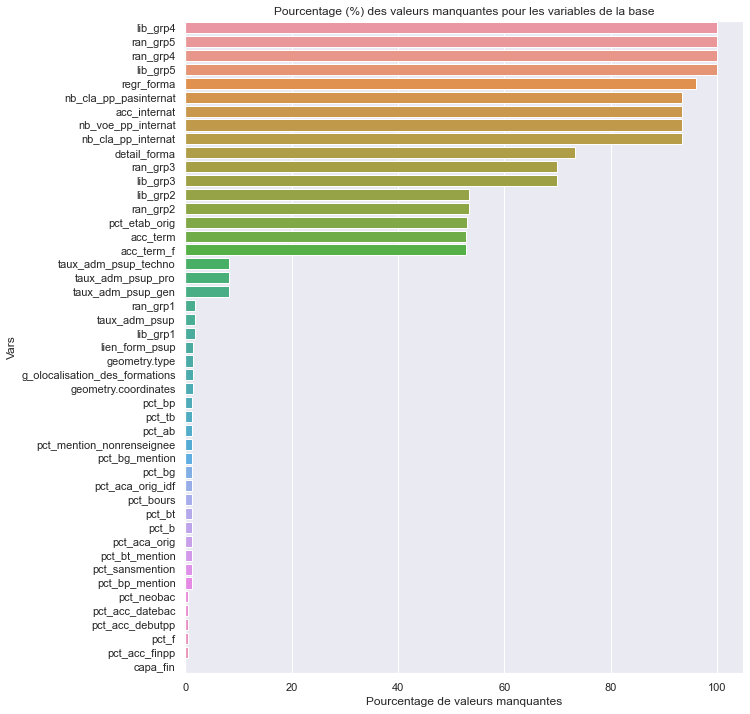

In [493]:
#Représentation de proportions par variables : la fonction est plot_missinngs (cf function.ipynb)
plot_missings(missings, seuil = 0)

In [494]:
#Suppression des variables "non pertinentes"
    #Critère 1 : sum(NA)>30%
var_del1 = list(missings[missings['Pourcentage de valeurs manquantes']>30]['Vars'])
    #Critère 2 : "pas itules pour l'analyse actuellement"
var_del2 = ['geometry.coordinates', 'geometry.type', 'datasetid','recordid','record_timestamp',  'g_olocalisation_des_formations', 'lien_form_psup', 'detail_forma', 'session']
var_del = list(np.unique(var_del1 + var_del2))

In [495]:
df = df.drop(var_del, axis = 1)

In [496]:
#Récapitulatif
missings_new = detect_missings(df, base_ref=global_data_voeux)


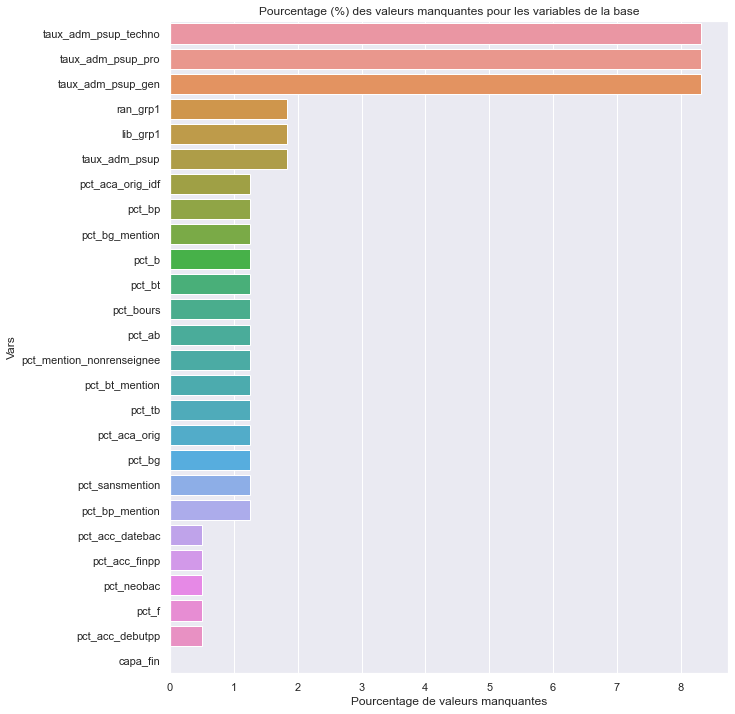

In [497]:
#Variables avec au moins une valeurs manquantes :  max = 8,5..%
plot_missings(missings_new, seuil = 0)

In [498]:
#Capacité de l'établissement par formation : Il existe établissement qui à une valeur manquante, à vérifier car problématique.
df['capa_fin'].isna().sum()

1

In [499]:
#En effet toute la ligne est presque constituée de na, alors on décide d'exclure cette ligne
df[df['capa_fin'].isna()]

,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,fil_lib_voe_acc,acc_brs,acc_bg,tri,acc_bg_mention,form_lib_voe_acc,cod_aff_form,fili,prop_tot_bp_brs,acad_mies,taux_adm_psup_gen,contrat_etab,pct_bp_mention,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,lib_comp_voe_ins,cod_uai,pct_acc_debutpp,dep,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,g_ea_lib_vx,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,region_etab_aff,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,lib_grp1,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,nb_voe_pc_bg,dep_lib,acc_bp,select_form,acc_b,pct_acc_datebac,taux_adm_psup_techno
2061,0,0,0,NaN,FCIL classe passerelle BTS,0,0,3_Autres formations,0,Mention complémentaire,22402,Autre formation,1.0,Toulouse,NaN,Public,NaN,0.0,0,0,0,0,0,0.0,NaN,NaN,0.0,0,0,0,Lycée Alexis Monteil - Mention complémentaire ...,0120024L,NaN,12,1.0,NaN,0.0,NaN,0,0,Lycée Alexis Monteil,NaN,0,NaN,0,0,NaN,NaN,NaN,0,0,NaN,0,0,1,0,0.0,0,Occitanie,0,NaN,0.0,0,0,0,0,0,0,0.0,NaN,0,0,0,NaN,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0,NaN,NaN,NaN,0,0,Aveyron,0,formation selective,0,NaN,NaN


In [500]:
#Suppression
df = df[~df['capa_fin'].isna()]

#### Imputation des valeurs manquantes

In [501]:
#Concentrons nous d'abord sur ces variables

In [502]:
#Variables qui ont au moins une valeur manquantes
any_miss = list(missings_new[missings_new['Pourcentage de valeurs manquantes'] > 0]['Vars'])

In [503]:
#On affiche les libélés des variables stockés dans un dictionnaire (name) crée dans function.ipyn
for key in any_miss:
    print("{}: {}\n".format(key,names[key]))

taux_adm_psup_techno: Dont taux d’accès des candidats ayant un bac TECHNO ayant postulé à la formation

taux_adm_psup_pro: Dont taux d’accès des candidats ayant un bac PRO ayant postulé à la formation

taux_adm_psup_gen: Dont taux d’accès des candidats ayant un bac général ayant postulé à la formation

ran_grp1: Rang du dernier appelé du groupe 1

lib_grp1: Regroupeme nt 1 effectué par les formations pour les classements

taux_adm_psup: Taux d’accès des candidats ayant postulé à la formation (ratio entre le dernier appelé et le nombre vœux PP)

pct_aca_orig_idf: % d_admis néo bacheliers issus de la même académie (paris/créteil/versailles réunies)

pct_bp: % d_admis néo bacheliers professionnels

pct_bg_mention: dont % d_admis avec mention

pct_b: % d_admis néo bacheliers avec mention Bien au bac

pct_bt: % d_admis néo bacheliers technologiques

pct_bours: % d_admis néo bacheliers boursiers

pct_ab: % d_admis néo bacheliers avec mention assez Bien au bac

pct_mention_nonrenseignee: % d_

In [504]:
#Ces variables sont liées et peuvent être recalculées avec les données donc pas besoin d'imputation
# taux_adm_psup = sum(rank) / nb_voe_pp
taux = ['taux_adm_psup', 'taux_adm_psup_techno' , 'taux_adm_psup_pro', 'taux_adm_psup_gen']

In [505]:
#On prends seulement les variables avec na au moins
df_any_miss = df[any_miss]

In [506]:
#Relation entre les variables : 
#pct_neobac = pct_bg + pct_bt + pct_bp + Autre
#acc_tot = acc_neobac + Autre
#pct_neobac = pct_bours + Autre = pct_sansmention + pct_ab + pct_b + pct_tb + pact_mention_nonrenseigne

In [507]:
#CAS où on a aucune informations sur les répartitions des admis
cond = (df_any_miss['pct_neobac'].isna()) & ((df_any_miss['pct_bg'].isna()) & (df_any_miss['pct_bt'].isna()) & (df_any_miss['pct_bp'].isna()) )
df[cond]
#Existerait-il des établissements sans admis? 

#Des établissement qui n'ont pas reçu aucune réponse sur leurs propositions
df[df['acc_tot'] ==0]

#S'agit-il de ces établissements : effectivement, oui!
df[df['acc_tot'] ==0].compare(df[cond])

#Il est donc intéressant de voir ces établissements : ceux qui les caractérisent

Empty DataFrame
Columns: []
Index: []

In [508]:
#En excluant ces établissements on peut corriger les valeurs manquantes sur les pct en utilisant les effectifs
for key in ['acc_tot','acc_brs', 'acc_neobac', 'acc_ab', 'acc_b', 'acc_tb', 'acc_bg','acc_bg_mention','acc_bt', 'acc_bt_mention', 'acc_bp', 'acc_bp_mention', 'acc_at'] : 
    print("{}: {}\n".format(key,names[key]))         
                

acc_tot: Effectif total des candidats ayant accepté la proposition del_établisseme nt (admis)

acc_brs: dont effectif des admis boursiers néo bacheliers

acc_neobac: Effectif des admis néobacheliers

acc_ab: dont effectif des admis néo bacheliers avec mention assez Bien au bac

acc_b: dont effectif des admis néo bacheliers avec mention Bien au bac

acc_tb: dont effectif des admis néo bacheliers avec mention Très Bien au bac

acc_bg: Effectif des admis néo bacheliers généraux

acc_bg_mention: Effectif des admis néo bacheliers généraux ayant eu une mention au bac

acc_bt: Effectif des admis néo bacheliers technologiques

acc_bt_mention: Effectif des admis néo bacheliers technologiqu es ayant eu une mention au bac

acc_bp: Effectif des admis néo bacheliers professionnels

acc_bp_mention: Effectif des admis néo bacheliers professionne ls ayant eu une mention au bac

acc_at: Effectif des autres candidats admis



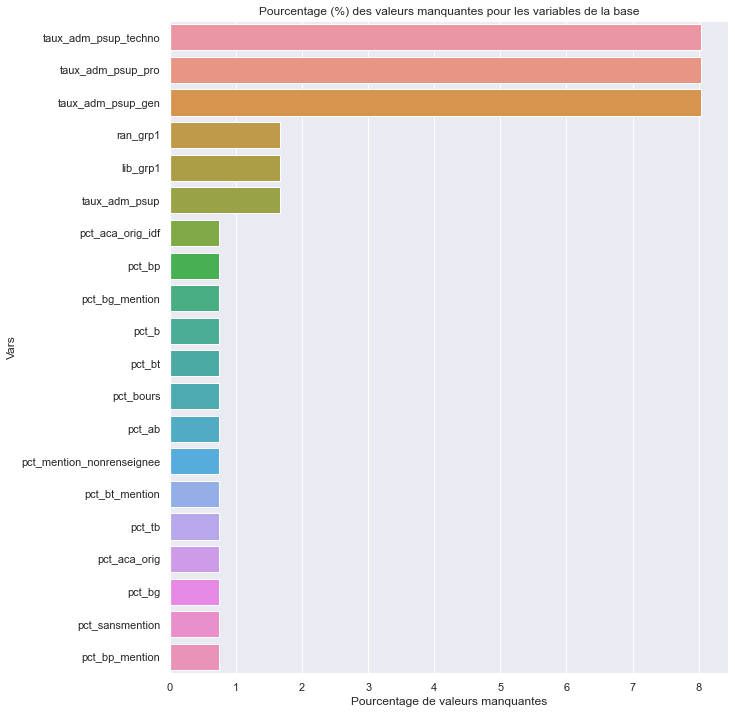

In [509]:
#Pour les établissements ayant au moins un admis, on a pas de valeurs manquantes sur les effectifs désagrégés (bg, bt, bp etc)
#On peut donc corriger les pourcentages!!
df_no_acc = df[(df['acc_tot']==0)]
plot_missings(detect_missings(df[(df['acc_tot']!=0)], base_ref=df), 0)

In [510]:
df_any_acc = df[df['acc_tot']!=0]
df_any_acc.shape


(12695, 95)

In [511]:
#Correction pour les agrégation selon le type de formation
dic = {'pct_bg' : 'acc_bg', 'pct_bt' : 'acc_bt', 'pct_bp' : 'acc_bp'}

In [512]:
df_any_acc.reset_index(inplace=True)
for pct, eff in dic.items() :
    #Dans le cas où le dénominateur est null, on remplace par 0
    df_any_acc0 = df_any_acc[(df_any_acc[pct].isna()) & (df_any_acc[eff] == 0)].fillna({pct : 0})
    df_any_acc = df_any_acc0.append(df_any_acc[~((df_any_acc[pct].isna()) & (df_any_acc[eff] == 0))].fillna({pct : 0}))
    #Dans le cas où le dénominateur n'est pas null, on applique la formule
    #df_any_acc_not_null = df_any_acc[(df_any_acc[pct].isna()) & (df_any_acc[eff] != 0)].fillna({pct : 100*df_any_acc[eff]/df_any_acc['acc_tot']})
    #Base finale
    #df_any_acc = df_any_acc_null.append(df_any_acc_not_null, ignore_index=True)

In [513]:
#On crée la variable qui capte le pourcentage des autres candidats admis
df_any_acc['pct_at'] = 100 - (df_any_acc['pct_neobac'])
df_any_acc.acc_at = df_any_acc.acc_tot - df_any_acc.acc_neobac

In [514]:
df_any_acc.shape

(12695, 97)

In [515]:
#Correction pour les agrégation selon la mention
dic = {'pct_bg_mention' : ['acc_bg_mention', 'acc_bg'], 'pct_bt_mention' : ['acc_bt_mention', 'acc_bt'], 'pct_bp_mention' : ['acc_bp_mention', 'acc_bp']}

In [516]:

for pct, eff in dic.items() :
    #df_any_acc[pct] = df_any_acc[eff]/df_any_acc['acc_tot']
    
    #df_any_acc[df_any_acc[eff[1]]!=0][pct].fillna(df_any_acc[df_any_acc[eff[1]!=0].isna()][eff[0]]/df_any_acc[~df_any_acc[eff[1]]!=0][eff[1]], inplace=True)
    #df_any_acc[df_any_acc[eff[1]]==0][pct].fillna(0, inplace=True)
    
    #Dans le cas où le dénominateur est null, on remplace par 0
    df_any_acc0 = df_any_acc[(df_any_acc[pct].isna()) & (df_any_acc[eff[1]] == 0)].fillna({pct : 0})
    df_any_acc = df_any_acc0.append(df_any_acc[~((df_any_acc[pct].isna()) & (df_any_acc[eff[1]] == 0))].fillna({pct : 0}))
    #Dans le cas où le dénominateur n'est pas null, on applique la formule
    #df_any_acc = df_any_acc[(df_any_acc[pct].isna()) & (df_any_acc[eff[1]] != 0)].fillna({pct : 100*df_any_acc[eff[0]]/df_any_acc[eff[1]]})


In [517]:
df_any_acc.shape

(12695, 97)

In [518]:
#Il semble que les valeurs manquantes sont seulement pour les établiblissements où pct_neobac=0 (normal), vérifions !
cond = (df_any_acc.pct_mention_nonrenseignee.isna()) & (df_any_acc.pct_bours.isna()) & (df_any_acc.pct_tb.isna()) & (df_any_acc.pct_b.isna()) & (df_any_acc.pct_ab.isna()) & (df_any_acc.pct_sansmention.isna())  & (df_any_acc.pct_b.isna()) & (df_any_acc.pct_aca_orig.isna()) & (df_any_acc.pct_aca_orig_idf.isna())

In [519]:
var = ['pct_tb', 'pct_b', 'pct_ab', 'pct_sansmention', 'pct_bours','pct_mention_nonrenseignee',  'pct_aca_orig', 'pct_aca_orig_idf']


In [520]:
df_any_acc[var][cond]

,pct_tb,pct_b,pct_ab,pct_sansmention,pct_bours,pct_mention_nonrenseignee,pct_aca_orig,pct_aca_orig_idf
2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
12441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [521]:
df_any_acc[var][df_any_acc['pct_neobac']==0]

,pct_tb,pct_b,pct_ab,pct_sansmention,pct_bours,pct_mention_nonrenseignee,pct_aca_orig,pct_aca_orig_idf
2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
12441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [522]:
#Les bases sont identiques
df_any_acc[['pct_neobac', 'pct_tb', 'pct_b', 'pct_ab', 'pct_sansmention', 'pct_bours', 'pct_mention_nonrenseignee',  'pct_aca_orig', 'pct_aca_orig_idf']][df_any_acc['pct_neobac']==0].compare(df_any_acc[['pct_neobac', 'pct_tb', 'pct_b', 'pct_ab', 'pct_sansmention', 'pct_bours', 'pct_mention_nonrenseignee',  'pct_aca_orig', 'pct_aca_orig_idf']][cond])
#Donc on remplace seulement les NA par 0 

Empty DataFrame
Columns: []
Index: []

In [523]:
df_any_acc[var] = df_any_acc[var].apply(lambda x : x.fillna(0))

In [524]:
df_any_acc[var][df_any_acc['pct_neobac']==0]

,pct_tb,pct_b,pct_ab,pct_sansmention,pct_bours,pct_mention_nonrenseignee,pct_aca_orig,pct_aca_orig_idf
2376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
12441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


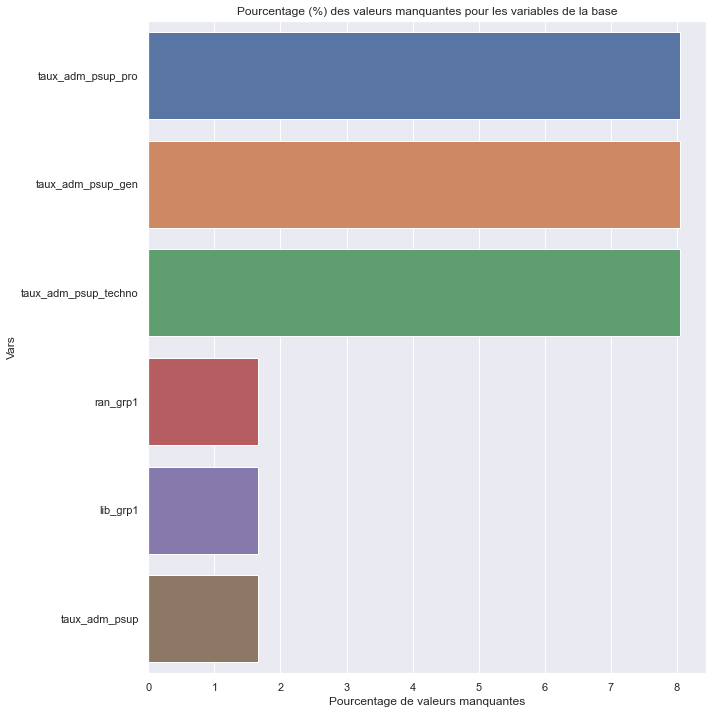

In [525]:
plot_missings(detect_missings(df_any_acc, base_ref= df), 0)

In [526]:
#Pour les établissements où on a pas de postulants pour un type de bac donné (général, tech ou pro) le NaN dans le taux d'admis est en réalité un 0

#Correction
dic = {'pct_bg' : 'taux_adm_psup_gen', 'pct_bt' : 'taux_adm_psup_techno', 'pct_bp' : 'taux_adm_psup_pro'}

In [527]:
df_any_acc[(df_any_acc['taux_adm_psup_gen']>0) & (df_any_acc['pct_bg']==0)][['pct_at', 'taux_adm_psup_gen','pct_bt', 'pct_bp', 'pct_bg', 'pct_neobac', 'taux_adm_psup' ]]

,pct_at,taux_adm_psup_gen,pct_bt,pct_bp,pct_bg,pct_neobac,taux_adm_psup
2414,100.00,100.0,0.000000,0.000000,0.0,0.00,19.0
6564,100.00,100.0,0.000000,0.000000,0.0,0.00,100.0
6727,100.00,81.0,0.000000,0.000000,0.0,0.00,NaN
6896,100.00,100.0,0.000000,0.000000,0.0,0.00,100.0
6984,100.00,93.0,0.000000,0.000000,0.0,0.00,22.0
...,...,...,...,...,...,...,...
12621,55.56,22.0,0.000000,100.000000,0.0,44.44,16.0
12652,50.00,50.0,0.000000,100.000000,0.0,50.00,9.0
12662,42.86,29.0,50.000000,50.000000,0.0,57.14,82.0
12666,33.33,33.0,0.000000,100.000000,0.0,66.67,100.0


In [528]:
##BASE PROPRE
#Les établissements ayant au moins reçu une demande admission

#Les établissements ayant reçu aucune demande admission
df_no_acc.fillna(0, inplace=True)
df_no_acc['pct_at'] = 0



In [529]:
#Variable d'identification
df_any_acc['Reçu au moins une admission'] = 'Oui'
df_no_acc['Reçu au moins une admission'] = 'Non'

In [530]:
#Merging des bases
base_globale_voeux = pd.concat([df_any_acc, df_no_acc])
base_globale_voeux.reset_index(inplace = True)
base_globale_voeux.set_index('g_ea_lib_vx', inplace=True)

In [531]:
base_globale_voeux.head()

,level_0,index,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,fil_lib_voe_acc,acc_brs,acc_bg,tri,acc_bg_mention,form_lib_voe_acc,cod_aff_form,fili,prop_tot_bp_brs,acad_mies,taux_adm_psup_gen,contrat_etab,pct_bp_mention,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,taux_adm_psup_pro,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,lib_comp_voe_ins,cod_uai,pct_acc_debutpp,dep,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,ran_grp1,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,region_etab_aff,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,lib_grp1,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,taux_adm_psup,pct_bt_mention,nb_cla_pp_bt,nb_voe_pc_bg,dep_lib,acc_bp,select_form,acc_b,pct_acc_datebac,taux_adm_psup_techno,pct_at,Reçu au moins une admission
g_ea_lib_vx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lycée Jean Zay,2376,2378.0,6,2,1,0.0,Europlastics et composites à référentiel commu...,0,0,2_Lycées,0,BTS - Production,20077,BTS,1.0,Clermont-Ferrand,0.0,Public,0.0,0.0,1,1,0,4,13,0.0,0.0,0.0,14.0,0,39,22,Lycée Jean Zay - BTS - Production - Europlasti...,0630069H,0.0,63,2.0,0.0,5.0,0.0,0,0,0.0,2,0.0,0,2,13.0,0.0,0.0,6,0,0.00,0,17,22,8,0.0,1,Auvergne-Rhône-Alpes,0,0.0,2.0,4,0,0,0,0,0,4.0,4.0,1,2,0,Bacheliers technologiques toutes séries,2,0,17,0.0,0.0,0.0,0.0,0.0,6,0,0.0,73.0,0.0,12,1,Puy-de-Dôme,0,formation selective,0,0.0,100.0,100.0,Oui
AgroSup Dijon Direction Enseignement à Distance (CNPR),2414,2416.0,57,5,11,0.0,Agronomie : Productions végétales,0,0,2_Lycées,0,BTS - Agricole,23463,BTS,0.0,Clermont-Ferrand,100.0,Public,0.0,2.0,0,3,0,1,6,0.0,0.0,0.0,3.0,2,93,79,AgroSup Dijon Direction Enseignement à Distanc...,0632001H,100.0,63,1.0,0.0,1.0,0.0,0,0,0.0,0,100.0,0,1,1.0,0.0,0.0,12,0,0.00,0,15,19,1,2.0,2,Auvergne-Rhône-Alpes,0,0.0,4.0,2,0,1,0,0,0,11.0,30.0,2,8,0,Bacheliers professionnels toutes séries,28,0,14,0.0,0.0,2.0,0.0,0.0,4,0,0.0,19.0,0.0,3,1,Puy-de-Dôme,0,formation selective,0,100.0,0.0,100.0,Oui
Université Paris 8,6160,146.0,0,0,0,0.0,Langues étrangères appliquées,0,0,1_universités,0,Licence - Arts-lettres-langues,28189,Licence,0.0,Créteil,NaN,Public,0.0,1.0,1,0,0,0,0,0.0,NaN,0.0,0.0,0,12,0,Université Paris 8 - Licence - Langues étrangè...,0931827F,0.0,93,0.0,0.0,0.0,0.0,0,0,0.0,1,100.0,0,0,NaN,0.0,0.0,10,0,0.00,0,0,5,0,0.0,1,Ile-de-France,0,0.0,0.0,0,0,0,0,0,0,5.0,25.0,1,0,0,NaN,6,0,12,0.0,0.0,0.0,0.0,0.0,5,0,0.0,NaN,0.0,0,1,Seine-Saint-Denis,0,formation non selec,0,0.0,NaN,100.0,Oui
INALCO,6564,550.0,2,0,0,0.0,"Langues, littératures & civilisations étrangèr...",0,0,1_universités,0,Licence - Arts-lettres-langues,9424,Licence,0.0,Paris,100.0,Public,0.0,1.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0,16,2,"INALCO - Licence - Langues, littératures & civ...",0753488J,0.0,75,0.0,0.0,0.0,0.0,0,0,0.0,0,100.0,0,0,2.0,0.0,0.0,13,0,100.00,0,2,8,0,0.0,1,Ile-de-France,0,0.0,0.0,0,0,0,0,0,0,8.0,10.0,1,2,1,Tous les candidats,6,0,14,0.0,0.0,0.0,0.0,0.0,6,0,0.0,100.0,0.0,0,1,Paris,0,formation non selec,0,0.0,0.0,100.0,Oui
Université de Strasbourg,6727,713.0,92,1,41,0.0,Musicologie,0,0,1_universités,0,Licence - Arts-lettres-langues,16033,Licence,0.0,Strasbourg,81.0,Public,0.0,0.0,1,0,0,0,8,0.0,0.0,0.0,0.0,25,193,142,Université de Strasbourg - Licence - Musicolog...,0673021V,0.0,67,0.0,0.0,0.0,0.0,0,0,0.0,3,0.0,4,0,NaN,0.0,0.0,43,0,45.16,0,0,29,3,0.0,31,Grand Est,0,0.0,0.0,0,0,0,0,0,0,29.0,35.0,31,0,14,NaN,91,0,51,0.0,0.0,0.0,0.0,0.0,1,0,0.0,NaN,0.0,0,2,Bas-Rhin,0,formation selective,0,0.0,19.0,100.0,Oui


###  **INSERTION PROFESSIONNEL**

Dans cette section nous passons à l'apurement de la base 'Insertion professionnelle'. Nous avons la variable 'remarque' qui renseigne si les données recueillies sont pertinentes ou robustes pour l'analyse, vis-à-vis des conditions de l'enquête ou des taux de réponses plus spécifiquement. Ainsi, nous respectons ce critère et décidons d'exclure ces lignes de l'analyse pour ne pas que ça ait un impact sur les résultats.

Text(0.5, 1.0, 'Remarque sur la pertience des données')

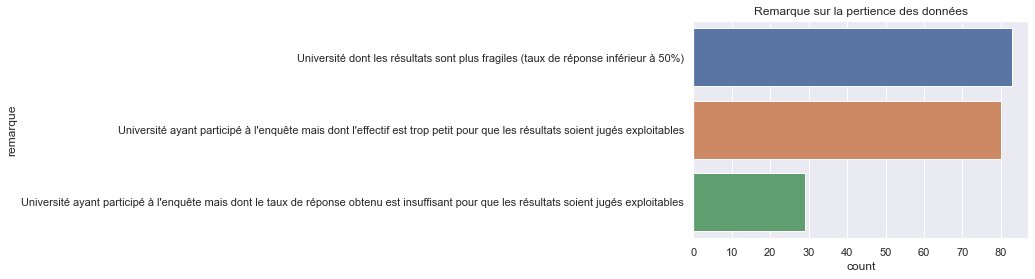

In [532]:
sns.countplot(data=glob_data_insertion, y='remarque', order=glob_data_insertion.remarque.value_counts().index )
plt.title('Remarque sur la pertience des données')

In [533]:
#On garde les établissements dont les données sont jugés pertinentes : ils n'ont aucune remarque particulière (na)
glob_data_insertion = glob_data_insertion[glob_data_insertion.remarque.isna()]

In [534]:
#Copy
df_insertion = glob_data_insertion.copy()

In [535]:
#On enlève les variables non pertinentes (en termes de contenu)
df_insertion = df_insertion.drop(["datasetid", "recordid", "record_timestamp", "remarque", 'etablissementactuel'], axis = 1)

In [536]:
#Affichage
df_insertion.set_index('etablissement').head()

,discipline,salaire_brut_annuel_estime,salaire_net_mensuel_regional_3eme_quartile,salaire_net_mensuel_median_regional,cle_disc,taux_de_reponse,emplois_cadre_ou_professions_intermediaires,taux_dinsertion,emplois_exterieurs_a_la_region_de_luniversite,emplois_stables,diplome,salaire_net_median_des_emplois_a_temps_plein,poids_de_la_discipline,taux_de_chomage_regional,code_du_domaine,emplois_a_temps_plein,code_de_la_discipline,de_diplomes_boursiers,academie,numero_de_l_etablissement,domaine,nombre_de_reponses,femmes,salaire_net_mensuel_regional_1er_quartile,cle_etab,emplois_cadre,situation,annee,id_paysage,code_de_l_academie
etablissement,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nice - Sophia-Antipolis,"Ensemble formations juridiques, économiques et...",27000,2240,1860,disc01_18,78,50,96,34,82,LICENCE PRO,1730,49,9,DEG,95,disc01,14,Nice,0060931E,"Droit, économie et gestion",91,60,1410,Nice - Sophia-Antipolis_18,7,18 mois après le diplôme,2018,7CYWd,A23
Nice - Sophia-Antipolis,Économie,ns,2240,1860,disc03_18,81,ns,90,ns,ns,LICENCE PRO,ns,16,9,DEG,ns,disc03,14,Nice,0060931E,"Droit, économie et gestion",29,ns,1410,Nice - Sophia-Antipolis_18,ns,18 mois après le diplôme,2018,7CYWd,A23
Nice - Sophia-Antipolis,Gestion,27900,2240,1860,disc04_18,75,56,100,24,90,LICENCE PRO,1790,27,9,DEG,92,disc04,14,Nice,0060931E,"Droit, économie et gestion",49,51,1410,Nice - Sophia-Antipolis_18,6,18 mois après le diplôme,2018,7CYWd,A23
Nice - Sophia-Antipolis,"Lettres, langues, arts",ns,2240,1860,disc06_18,63,ns,ns,ns,ns,LICENCE PRO,ns,1,9,LLA,ns,disc06,14,Nice,0060931E,"Lettres, langues, arts",3,ns,1410,Nice - Sophia-Antipolis_18,ns,18 mois après le diplôme,2018,7CYWd,A23
Nice - Sophia-Antipolis,Information communication,ns,2240,1860,disc10_18,67,ns,ns,ns,ns,LICENCE PRO,ns,3,9,SHS,ns,disc10,14,Nice,0060931E,Sciences humaines et sociales,6,ns,1410,Nice - Sophia-Antipolis_18,ns,18 mois après le diplôme,2018,7CYWd,A23


#### Doublons

In [537]:
#On conclue l'absence de doublons
df_insertion.duplicated().any()

False

#### Valeurs manquantes

In [538]:
missings = detect_missings(df_insertion, base_ref=glob_data_insertion)

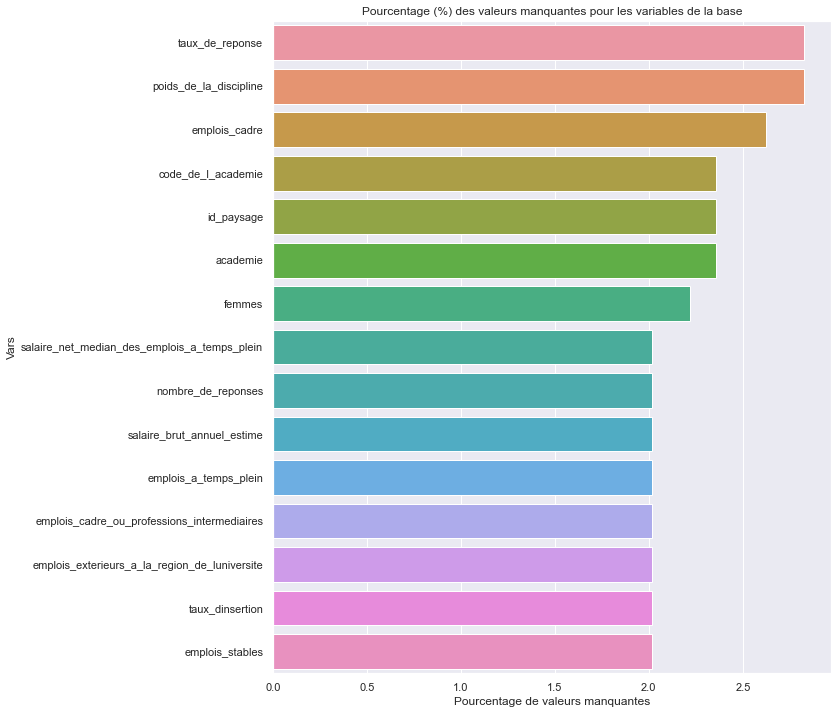

In [539]:
# A première vue, il semble pas avoir trop de valeurs manquantes. Mais (cf cellule suivante -->)
plot_missings(missings,0)

In [540]:
#Certaines variables n'ont aucun sens dans l'analyse : comme [code_de_lacademie, id_paysage ]
df_insertion = df_insertion.drop(['code_de_l_academie', 'id_paysage' ], axis = 1)

Selon la réference des données, il est indiqué que les données non significatif (valeurs faibles) sont labélisées 'ns : non significative' et les données manquantes par 'nd : non disponibles'. Par conséquent, nous allons d'ores et déjà remplacer tous les 'nd' par Nan compréhensibles par Python, comme étant effectivement des NaN. Ensuite pour le cas du label 'ns', nous déidons d'identifier ces données par 0 (pour dire faible). Ainsi, nous pourrons voir les établissements qui on des taux d'insertion faibles, moyens ou élevés.

In [541]:
df_insertion= df_insertion.apply(lambda x : x.replace({'ns' : 0, 'nd' : np.nan}), axis=1)


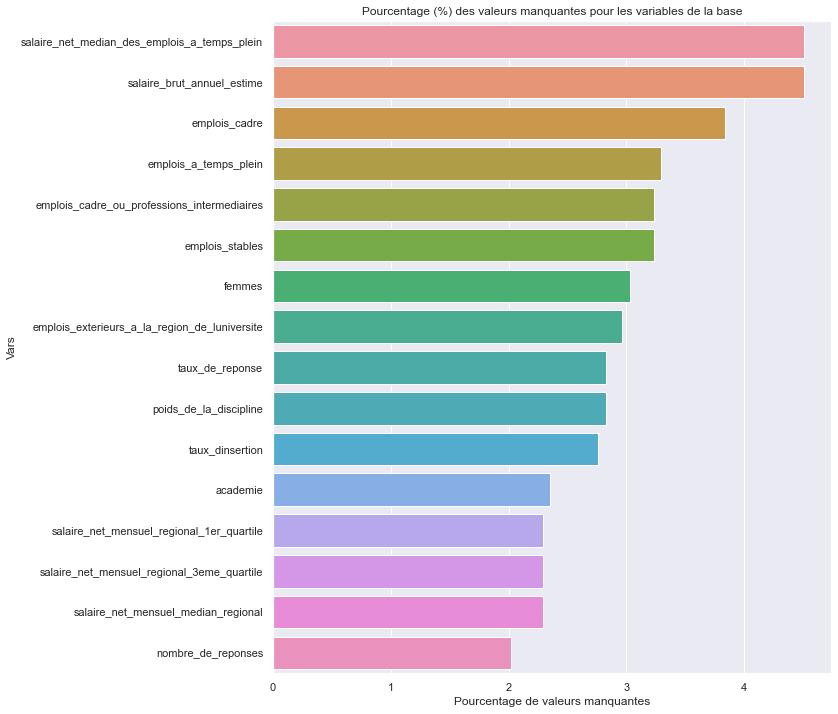

In [542]:
missings = detect_missings(df_insertion, base_ref=glob_data_insertion)
plot_missings(missings,0)

#### Recherche de MCAR (Missing Completly At Random) : 

Nous vérifions si on est en face de valeurs manquantes de type **MCAR (Missing Completly At Random)** : auquel cas supprimer ces onnées n'impacterons pas l'analyse.

In [543]:
#On récupère ces variables Variables
var_with_miss = list(missings[missings['Pourcentage de valeurs manquantes']>0]['Vars'])

In [544]:
#On ajoute diplome : On cherche à voir si les Na peut être expliqués par le diplome (ce qui n'ont pas licence susceptibles de ne pas encore travailler)
vars = var_with_miss + ['diplome']

In [545]:
vars

['salaire_net_median_des_emplois_a_temps_plein',
 'salaire_brut_annuel_estime',
 'emplois_cadre',
 'emplois_a_temps_plein',
 'emplois_cadre_ou_professions_intermediaires',
 'emplois_stables',
 'femmes',
 'emplois_exterieurs_a_la_region_de_luniversite',
 'taux_de_reponse',
 'poids_de_la_discipline',
 'taux_dinsertion',
 'academie',
 'salaire_net_mensuel_regional_1er_quartile',
 'salaire_net_mensuel_regional_3eme_quartile',
 'salaire_net_mensuel_median_regional',
 'nombre_de_reponses',
 'diplome']

In [546]:
#Prend 1 si NaN et 0 sinon
matrix = 1-1*df_insertion[var_with_miss].isna()

In [547]:
matrix['diplome'] = df_insertion['diplome']

In [548]:
#Pour chaque variable, on regarde sa dépendance avec le diplome

In [549]:
from sklearn.feature_selection import chi2

In [550]:
F, pvalue = chi2(matrix[var_with_miss], matrix['diplome'])

In [551]:
pvalue<0.05

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

Donc on peut voir que ne peut pas rejetter l'hypothèse d'indépendance, par conséquent on peut supposer qu'on est bien dans un cas de **MCAR (Missing Completly At Random)** : auquel cas les exclure n'impactera pas l'analyse.

In [552]:
#BASE PROPRE 
df_insertion_finale = df_insertion

## 2.1 Caractéristiques des établissements selon les voeux
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

# PARTIE 2 <div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> : Statistiques descriptives</font> </div>

## 2.1 Caractéristiques des établissements selon les voeux
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

#### Les filières les plus fréquentes au niveau des établissements

In [553]:
#On construit un graphe résumant comment les établissements sont 'répartis' selon le type du filière. 

In [554]:
table = base_globale_voeux[['cod_uai', 'fili']].pivot_table(index='cod_uai', columns='fili', aggfunc=len)

In [555]:
matrix = 1-1*table.isna()
matrix.reset_index(inplace = True)
matrix = matrix.melt(id_vars='cod_uai', value_vars=matrix.columns, var_name='Filière', value_name='Fréquence')
matrix = matrix.groupby('Filière').sum()
matrix['Pourcentage (%)'] = matrix['Fréquence']/table.shape[0]*100
matrix.sort_values(by='Pourcentage (%)',  inplace=True, ascending=False)

In [556]:
matrix

,Fréquence,Pourcentage (%)
Filière,,
BTS,2115,56.354916
Autre formation,956,25.472955
CPGE,415,11.057820
IFSI,324,8.633094
Ecole d'Ingénieur,199,5.302425
...,...,...
DUT,187,4.982681
Licence_Las,104,2.771116
EFTS,101,2.691180


**Quelles sont les filières les plus présentes ?**

Le graphe ci-dessous montre la filière BTS est celle la plus fréquente au niveau des établissements. Plus de 50% des établissement offrent une formation débouchant sur un diplôme BTS. Les filières les plus rares (moins de 5% des établissements) sont la filière Licence accès Santé, la filière EFTS, les écoles de commerce et la filière Parcours Accès Santé Spécifique qui n'est proposée que par 1% des établissements.

Text(0.5, 1.0, 'Graphique 1 : Taux de participation des établissements selon la filière de formation')

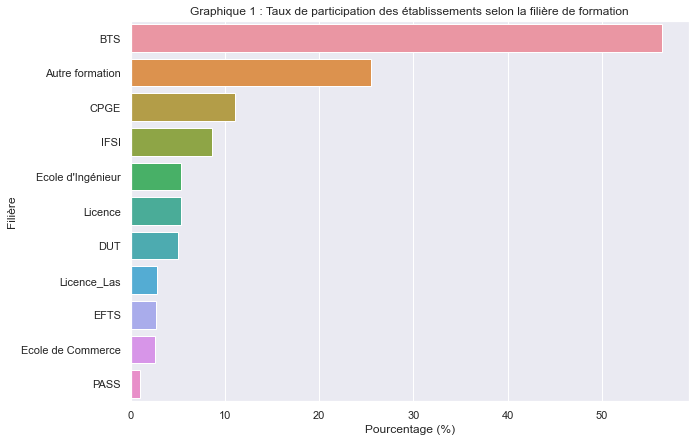

In [557]:
#Répartition des établissemnts selon les filières
plt.subplots(figsize=(10, 7))
sns.barplot(y=matrix.index,  x="Pourcentage (%)", data=matrix, ci=None).set_title("Graphique 1 : Taux de participation des établissements selon la filière de formation")


**Cependant quellles sont les filières les plus demandées ?**

In [558]:
glob_data = base_globale_voeux.copy()

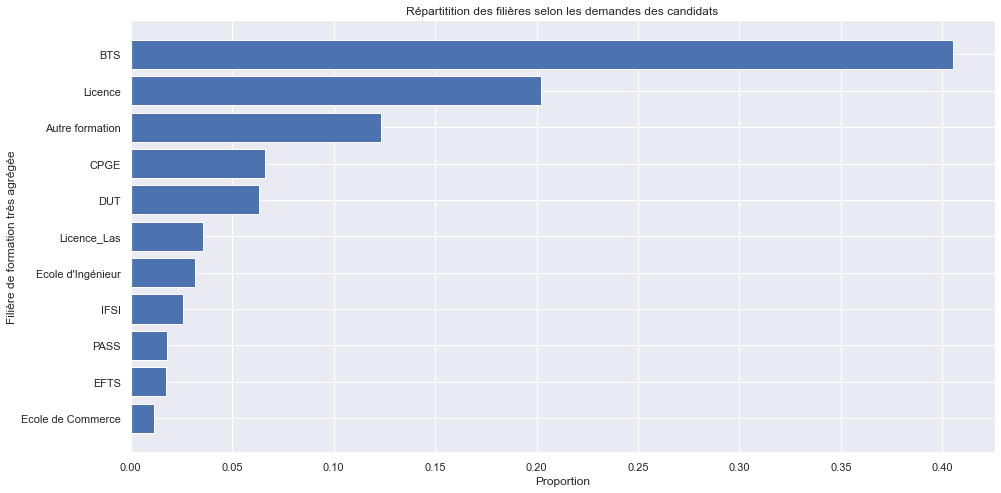

In [559]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.barh(list(glob_data['fili'].value_counts(ascending=True, normalize=True).index),
        glob_data['fili'].value_counts(ascending=True, normalize=True))
plt.xlabel("Proportion")
plt.ylabel("Filière de formation très agrégée")
plt.legend
plt.title("Répartitition des filières selon les demandes des candidats")
plt.show()

Les filières de formation les plus demandées par les néobacheliers et étudiants en réorientation ou reprise sont pour la plupart le BTS et la Licence. En effet, plus de 40% des voeux sont pour addressés pour le BTS, suivi de la Licence avec un taux d'un peu plus de 20%. Les formations les moins demandées sont les écoles de commerce, les EFTS, les Permanences d'accès aux soins de santé (PASS), les Ecoles d'ingénieur ...

Cette faible demande envers les filières telles que Ecole d'ingénieur, Ecole de commerce peu sembler paradoxale vu la qualité de formation offerte. Pour mieux apprehender ce phenomène, nous allons analyser par l'accessibilité (formation sélectivite ou non) à ces filières.

### Caractéristique des établissements

#### types des établissements

Text(0.5, 1.0, ' types des étblissements')

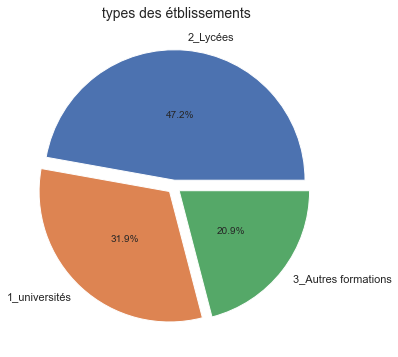

In [560]:
# types des étblissements
pie, ax = plt.subplots(figsize=[8,6])
plt.pie(x= glob_data['tri'].value_counts(), 
        autopct="%.1f%%", explode=[0.05]*3, 
        labels=list(glob_data['tri'].unique()), 
        pctdistance=0.5)
plt.title(" types des étblissements", fontsize=14)

La repartition des voeux pour les filières de formation par établissement nous renseigne que près de la moitié (47,2%) des voeux sont addressés à des Lycée. S'ensuit les universités avec un taux de 31,9% de voeux. Les autres établissements, quant à eux, ont reçu 21% des voeux d'orientation. 

#### Statuts des étblissements

Text(0.5, 1.0, ' Statuts des étblissements')

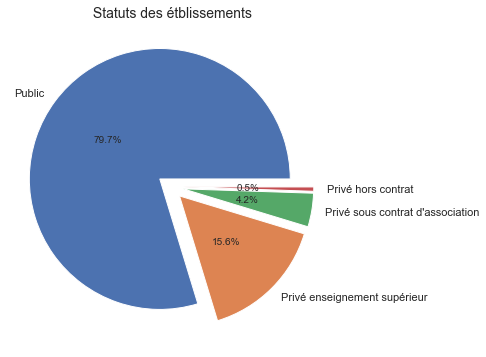

In [561]:
# Statuts des étblissements

pie, ax = plt.subplots(figsize=[8,6])
plt.pie(x= glob_data['contrat_etab'].value_counts(), 
        autopct="%.1f%%", explode=[0.1]*len(glob_data['contrat_etab'].value_counts()), 
        labels=list(glob_data['contrat_etab'].unique()), 
        pctdistance=0.5)
plt.title(" Statuts des étblissements", fontsize=14)

Les établissements demandés par les néo-bacheliers et étudiants en réorientation ou reprise sont pour la plupart publics. En effet, près de 80% de ses établissements ont le status public. Ils sont suivis par les établissements avec le status "Privé sous contrat d'association" (15,6%). Les autres établissements sont en faible proportion avec respectivement 4,16% et 0,53% pour les status "Privé enseignement supérieur" et "Privé hors contrat"

#### Selectivité de la formation

Text(0.5, 1.0, ' Selectivité de la formation')

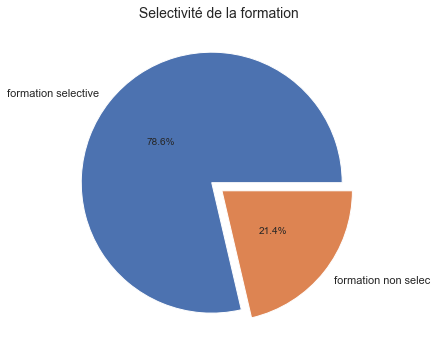

In [562]:
#Selectivité de la formation
pie, ax = plt.subplots(figsize=[8,6])
plt.pie(x= glob_data['select_form'].value_counts(), 
        autopct="%.1f%%", explode=[0.05]*len(glob_data['select_form'].value_counts()), 
        labels=list(glob_data['select_form'].unique()), 
        pctdistance=0.5)
plt.title(" Selectivité de la formation", fontsize=14)

Le terme de filière sélective signifie qu’il existe un nombre de places limité proposé par l’établissement envisagé et que l’admission dans la formation n’est pas automatique si une demande est faite.
L'analyse de la sélectivité des établissement nous renseigne que près de quatre voeux sur cinq sont addressées à des filières de formation selectives. Pour mieux cerner cette selectivité, nous allons effectuer une analyse bivariée avec le type d'établissement et les filières de formations renseignées. 

#### Sélectivité des établissements selon leur type

In [563]:
## Création d'une sous base pour la selectivité et type d'etablissement
sele_tri = glob_data[['select_form','tri']].pivot_table(index='tri',
                                                  columns='select_form', 
                                                  aggfunc=len,margins=True,
                                                  margins_name="Total")
sele_tri.reset_index(inplace=True)

for col in ["formation non selec","formation selective"] :
    sele_tri[col] = 100*sele_tri[col]/sele_tri['Total']

<AxesSubplot:xlabel='tri', ylabel='frequence'>

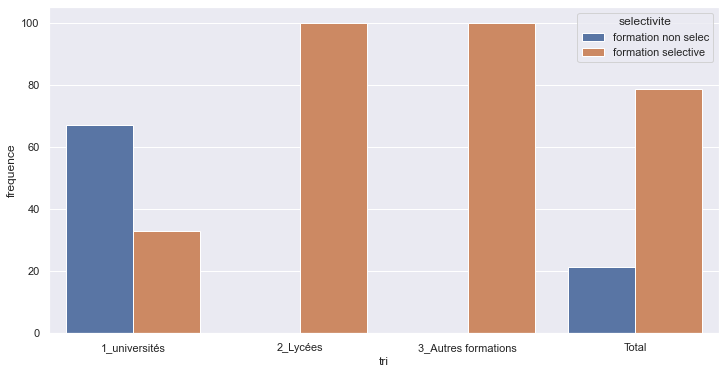

In [564]:
## Transformation de la base de Large en Long afin de representer un graphe pertinent
sele_tri = pd.melt(sele_tri,id_vars="tri", 
                   value_vars=['formation non selec','formation selective'], 
                   var_name ='selectivite',value_name = "frequence")

## Graphe
plt.figure(figsize=(12,6))
sns.barplot(x=sele_tri["tri"],y=sele_tri["frequence"],hue = sele_tri["selectivite"])

En analysant de plus près la selectivité des formations, on remarque qu'en général, il y a plus de formations selectives. En effet, près de 80% des voeux sont addressés à des formations selectives. Aussi, les Lycées et Autres formations n'ont que des formations selectives.  

In [565]:
contr_tri = glob_data[['contrat_etab','tri']].pivot_table(index='tri',
                                                   columns='contrat_etab',
                                                   aggfunc=len,margins=True,
                                                   margins_name="Total")
contr_tri

contrat_etab,Privé enseignement supérieur,Privé hors contrat,Privé sous contrat d'association,Public,Total
tri,,,,,
1_universités,182,1,2,3881,4066
2_Lycées,27,30,1396,4567,6020
3_Autres formations,322,37,592,1722,2673
Total,531,68,1990,10170,12759


## 2.1 Caractéristiques des établissements selon les diplomés
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

Dans cette section, nous caractérisons les établissements au regard des indicateurs disponibles au niveau des diplômés.

In [566]:
df_insertion = df_insertion_finale.copy()

In [567]:
#création variable nombre de personnes insérées
df_insertion["taux_dinsertion"] = df_insertion["taux_dinsertion"].astype('float64')
df_insertion["nombre_de_reponses"] = df_insertion["nombre_de_reponses"].astype('float64')
df_insertion['nb_insertion']= df_insertion["taux_dinsertion"]*df_insertion["nombre_de_reponses"]/100

### Répartition des insérés par discipline et par établissement

In [568]:
# Répartition des insérés par discipline
df_g =df_insertion.groupby(['discipline'])[['nombre_de_reponses', 'nb_insertion']].sum()

# Calcul du taux d'insertion par discipline
df_g['taux_par_discipline'] = df_g['nb_insertion']/df_g['nombre_de_reponses']*100

df_g.sort_values('taux_par_discipline', inplace=True)

<AxesSubplot:xlabel='taux_par_discipline', ylabel='discipline'>

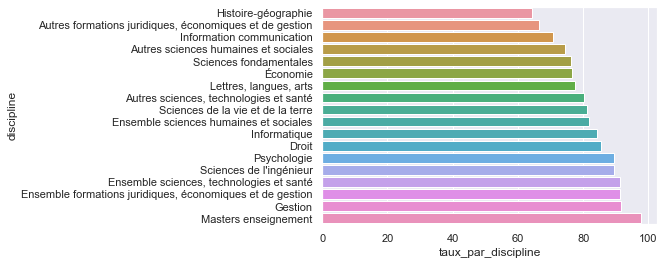

In [569]:
# Représentation graphique
df_g.reset_index(inplace = True)
sns.barplot(x="taux_par_discipline", y="discipline", data=df_g)

Les masters d'enseignement ont la plus grande proportion d'insérés 18 mois après le diplome. En effet, 97,7% des sortants des masters d'enseignement sont insérés dans le milieu professionnel. Il s'en suit les formations en "Sciences, technologies et santé",en "Formations juridiques, économiques et de gestion" et en "Gestion" où la proportion des insérés parmi les sortants est de 91%. Cependant, les formations en "Histoire-géographie", "Autres formations juridiques, économiques et de gestion" et "Information communication" ont les plus faibles proportions d'insérés avec respectivement 64,3%, 66,5% et 70,8% d'insérés.

In [570]:
# Répartition des insérés par établissement
df_g1 =df_insertion.groupby(['cle_etab'])[['nombre_de_reponses', 'nb_insertion']].sum()

# Calcul du taux d'insertion par établissement
df_g1['taux_par_établissement'] = df_g1['nb_insertion']/df_g1['nombre_de_reponses']*100

df_g1.sort_values('taux_par_établissement', inplace=True)

In [571]:
df_g1

,nombre_de_reponses,nb_insertion,taux_par_établissement
cle_etab,,,
Nîmes_18,249.0,38.22,15.349398
Antilles_18,398.0,134.69,33.841709
INU Jean-François Champollion_18,263.0,117.24,44.577947
Avignon_18,397.0,186.56,46.992443
Corse Pasquale Paoli_18,209.0,115.48,55.253589
...,...,...,...
Paris 2 - Panthéon Assas_18,598.0,538.25,90.008361
Bordeaux_18,3963.0,3587.70,90.529902
Toutes universités et établissements assimilés_18,97493.0,88753.48,91.035746


L'université de Lille a la plus grande proportion d'insérés. Le pourcentage d'insérés 18 mois après le diplome de l'université de Lille est de 98%. Les autres universités qui ont eu les plus grandes proportions d'insérés 18 mois après le diplome sont Lyon2-Lumière, Bordeaux et Paris2- Panthéon Assas avec respectivement 91,1%, 90,5% et 90,0%.
Par contre, les plus faibles proportions d'insertion 18 mois après le diplome sont obtenues par les établissements Nimes, Antilles et INU Jean-François Champollion avec respectivement 15,3%, 33,8% et 44,5% respectivement.

### Caractéristiques des sortants

#### Selon le sexe

In [572]:
#création variable nombre de femmes
df_insertion["femmes"] = df_insertion["femmes"].astype('float64')
df_insertion["nombre_de_reponses"] = df_insertion["nombre_de_reponses"].astype('float64')
    
df_insertion['nb_femmes']= df_insertion["femmes"]*df_insertion["nombre_de_reponses"]/100

In [573]:
# Répartition des femmes par établissement
df_g2 =df_insertion.groupby(['cle_etab'])[['nombre_de_reponses', 'nb_femmes']].sum()

# Calcul du pourcentage de femmes par établissement
df_g2['taux_femmes_par_étab'] = df_g2['nb_femmes']/df_g2['nombre_de_reponses']*100

df_g2.sort_values('taux_femmes_par_étab', inplace=True)

In [574]:
df_g2

,nombre_de_reponses,nb_femmes,taux_femmes_par_étab
cle_etab,,,
Nîmes_18,249.0,24.57,9.867470
INU Jean-François Champollion_18,263.0,35.24,13.399240
Le Mans_18,736.0,193.03,26.226902
Toulouse 3 - Paul Sabatier_18,1786.0,561.93,31.463046
Artois_18,1088.0,343.94,31.612132
...,...,...,...
Toulouse - Jean Jaures_18,1651.0,1049.08,63.542096
Montpellier 3 - Paul-Valéry_18,860.0,548.11,63.733721
Paris 1 - Panthéon Sorbonne_18,2089.0,1331.69,63.747726


Parmi les sortants 18 mois après le diplome, l'université Antilles a la plus grande proportion de femmes. Le pourcentage de femmes parmi les sortants de l'université de Antilles est de 83,1%. Les proportions de femmes sortants dans les établissements Paris3- Sorbonne Nouvelle, Lille, Bordeaux-Montaigne et Montpellier3 sont respectivement 78,3%, 75,0%, 73,3% et 72,0%. Les établissements ayant les plus proportions de femmes parmi les sortants sont INU Jean-François Champollion, Toulouse 3 - Paul Sabatier, Université Polytechnique Hauts-de-France et Artois, soient moins de 40% de femmes parmi les sortants.

#### Selon le nombre de boursiers

In [575]:
#création variable nombre de diplomés boursiers

df_insertion["de_diplomes_boursiers"] = df_insertion["de_diplomes_boursiers"].astype('float64')
df_insertion["nombre_de_reponses"] = df_insertion["nombre_de_reponses"].astype('float64')
    
df_insertion['nb_de_diplomes_boursiers']= df_insertion["de_diplomes_boursiers"]*df_insertion["nombre_de_reponses"]/100

In [576]:
# Répartition des boursiers par établissement
df_g3 =df_insertion.groupby(['cle_etab'])[['nombre_de_reponses', 'nb_de_diplomes_boursiers']].sum()

# Calcul de la proportion de boursiers par établissement
df_g3['taux_boursiers_par_étab'] = df_g3['nb_de_diplomes_boursiers']/df_g3['nombre_de_reponses']*100

df_g3.sort_values('taux_boursiers_par_étab', inplace=True)

In [577]:
df_g3

,nombre_de_reponses,nb_de_diplomes_boursiers,taux_boursiers_par_étab
cle_etab,,,
Évry-Val d'Essonne_18,324.0,19.44,6.000000
Versailles Saint-Quentin-en-Yvelines_18,896.0,59.68,6.660714
Paris-Est Marne-la-Vallée_18,1933.0,195.87,10.132954
Paris 2 - Panthéon Assas_18,598.0,65.78,11.000000
Mulhouse - Haute Alsace_18,903.0,99.89,11.062016
...,...,...,...
Toulouse - Jean Jaures_18,1651.0,630.91,38.213810
Antilles_18,398.0,157.82,39.653266
Rennes 2_18,1140.0,524.32,45.992982


Parmi les établissements, Montpellier3 a la plus grande proportion de boursiers parmi les sortants. La moitié des sortants de Montpellier3 sont des boursiers. La part des sortants boursiers des établissements La Réunion, Rennes 2 est de 46,5% et 45,5% respectivement. Les autres établissements restants ont moins de 40% de boursiers parmi les sortants. Les établissements Évry-Val d'Essonne et Versailles Saint-Quentin-en-Yvelines ont les plus faibles proportions de sortants boursiers, soit moins de 10%.

#### Selon le nombre d'emplois stables

In [578]:
#création variable nombre d'emplois stables
df_insertion[df_insertion['emplois_stables'] == 'ns'] = np.nan
df_insertion[df_insertion['emplois_stables'] == 'nd'] = np.nan

df_insertion["emplois_stables"] = df_insertion["emplois_stables"].astype('float64')
df_insertion["nombre_de_reponses"] = df_insertion["nombre_de_reponses"].astype('float64')
    
df_insertion['nb_emplois_stables']= df_insertion["emplois_stables"]*df_insertion["nombre_de_reponses"]/100

In [579]:
# Répartition des employés stables par établissement
df_g4 =df_insertion.groupby(['cle_etab'])[['nombre_de_reponses', 'nb_emplois_stables']].sum()

# Calcul de la proportion d'employés stables par établissement
df_g4['taux_emplois_stables_par_étab'] = df_g4['nb_emplois_stables']/df_g4['nombre_de_reponses']*100

df_g4.sort_values('taux_emplois_stables_par_étab', inplace=True)

In [580]:
df_g4

,nombre_de_reponses,nb_emplois_stables,taux_emplois_stables_par_étab
cle_etab,,,
Nîmes_18,249.0,32.37,13.000000
Antilles_18,398.0,88.24,22.170854
Avignon_18,397.0,113.03,28.471033
Corse Pasquale Paoli_18,209.0,66.53,31.832536
INU Jean-François Champollion_18,263.0,94.13,35.790875
...,...,...,...
Paris-Saclay_18,1977.0,1406.78,71.157309
Lorraine_18,4149.0,2959.09,71.320559
Lyon 1 - Claude Bernard_18,2183.0,1563.85,71.637655


Les sortants ayant un emploi stable 18 mois après le diplome de l'université de Lille représente 91,0%, soit la plus grande propotion d'emplois stables. De plus, les sortants des établissements Nimes, Évry-Val d'Essonne et Cergy-Pontoise se retrouvant avec un emploi stable représentent un peu plus de 80%. Par contre, l'université Rennes 2 est celle qui a moins de sortants avec des emplois stables, soit 45,7%. Sinon tous les autres établissements ont plus de la moitié de leurs sortants qui se retrouvent avec des emplois stables.

#### Selon le salaire

In [581]:
#création variable salaires bruts annuels estimés
df_insertion[df_insertion['salaire_brut_annuel_estime'] == 'ns'] = np.nan
df_insertion[df_insertion['salaire_brut_annuel_estime'] == 'nd'] = np.nan

df_insertion["salaire_brut_annuel_estime"] = df_insertion["salaire_brut_annuel_estime"].astype('float64')

#création de la variable salaire pondéré
df_insertion["salaire_brut_pond"] = df_insertion["salaire_brut_annuel_estime"]*df_insertion['nb_insertion']

In [582]:
# Répartition des salaires par établissement

df_g5 =df_insertion.groupby(['cle_etab'])[['nb_insertion', 'salaire_brut_pond']].sum()
# Calcul du salaire moyen par établissement
df_g5['salaire_moyen_par_étab'] = df_g5['salaire_brut_pond']/df_g5['nb_insertion']*100

df_g5.sort_values('salaire_moyen_par_étab', inplace=True)

In [583]:
df_g5

,nb_insertion,salaire_brut_pond,salaire_moyen_par_étab
cle_etab,,,
Strasbourg_18,2756.24,22546632.0,8.180214e+05
Corse Pasquale Paoli_18,115.48,1206772.0,1.045005e+06
Mulhouse - Haute Alsace_18,677.85,7922400.0,1.168754e+06
Avignon_18,186.56,2666928.0,1.429528e+06
Antilles_18,134.69,2158728.0,1.602738e+06
...,...,...,...
Toulouse 1 - Capitole_18,1663.45,50638275.0,3.044172e+06
Paris-Saclay_18,1741.70,55189517.0,3.168715e+06
Paris 2 - Panthéon Assas_18,538.25,17093909.0,3.175831e+06


Les sortants des établissements Antilles et Paris 2 ont les salaires moyens bruts annuels les plus élevés avec plus de 37000 euros. Il s'en suit les établissements Paris 1, Université de Sorbonne, Paris Saclay avec des salaires moyens bruts annuels d'environ 34000 euros. Les établissements avec les plus faibles salaires moyens bruts annuels sont INU Jean-François Champollion, Nîmes, Bordeaux - Montaigne et Toulon avec un peu moins de 25000 euros.

In [584]:
# Répartition des salaires bruts annuels /discipline
df_g6 =df_insertion.groupby(['domaine'])[['nb_insertion', 'salaire_brut_pond']].sum()
# Calcul du salaire moyen par domaine
df_g6['salaire_moyen_par_domaine'] = df_g6['salaire_brut_pond']/df_g6['nb_insertion']*100

df_g6.sort_values('salaire_moyen_par_domaine', inplace=True)

In [585]:
df_g6

,nb_insertion,salaire_brut_pond,salaire_moyen_par_domaine
domaine,,,
"Lettres, langues, arts",4757.86,1.117747e+08,2.349264e+06
Sciences humaines et sociales,24957.95,6.006726e+08,2.406739e+06
Masters enseignement,12334.68,3.228214e+08,2.617185e+06
"Sciences, technologies et santé",57537.59,1.621185e+09,2.817610e+06
"Droit, économie et gestion",67837.77,1.940652e+09,2.860725e+06


<AxesSubplot:xlabel='salaire_moyen_par_domaine', ylabel='domaine'>

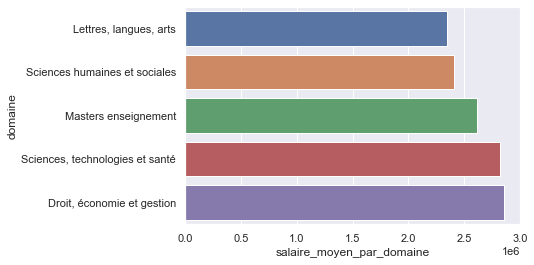

In [586]:
df_g6.reset_index(inplace = True)
sns.barplot(x="salaire_moyen_par_domaine", y="domaine", data=df_g6)

La répartition des salaires bruts moyens annuels selon le domaine montre que le domaine du "Droit, économie et gestion" a le salaire moyen le plus élevé, suivi du domaine de "Sciences, technologies et santé" avec près de 30000 euros. Le domaine des "Lettres, langues, arts" enregistre les salaires bruts annuels les plus faibles, soit un peu plus de 25000 euros.

----------------------------------------------------------------

# PARTIE 3 <div style ="border: blue solid 5px; font-family: cambria; 	box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> : MODELISATION DES VOEUX D'ORIENTATION</font> </div>


## 3.1 Prétraitement pour la modélisation
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

In [587]:
## Base voeux d'orientation
df1 = base_globale_voeux.copy()
df1['cod_uai'].sample(3)

g_ea_lib_vx
Lycée Modeste Leroy                     0270017X
Université Sorbonne Nouvelle Paris 3    0751719L
Lycée André Malraux                     0770938B
Name: cod_uai, dtype: object

### a - Suppression des colonnes unitiles
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

In [588]:
# Affichage des variables catégorielles
df1.select_dtypes('object').columns

Index(['fil_lib_voe_acc', 'tri', 'form_lib_voe_acc', 'cod_aff_form', 'fili',
       'acad_mies', 'contrat_etab', 'lib_comp_voe_ins', 'cod_uai', 'dep',
       'region_etab_aff', 'lib_grp1', 'dep_lib', 'select_form',
       'Reçu au moins une admission'],
      dtype='object')

In [589]:
df_voeux = df1.drop(['fil_lib_voe_acc', 'form_lib_voe_acc', 'cod_aff_form',
        'lib_comp_voe_ins', 'dep',
        'lib_grp1', 
        'cod_uai','ran_grp1']+taux, axis = 1)
df_voeux.select_dtypes('object').columns

Index(['tri', 'fili', 'acad_mies', 'contrat_etab', 'region_etab_aff',
       'dep_lib', 'select_form', 'Reçu au moins une admission'],
      dtype='object')

### Identification des individus
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

Afin de faire l'analyse explicative des voeux par filière. Nous allons effectuer un regroupage des voeux par filiere de formation agrégée. 

In [590]:
df_voeux.reset_index(inplace = True)
df_voeux.head()

,g_ea_lib_vx,level_0,index,nb_voe_pp_at,nb_voe_pp_bp,nb_voe_pp_bg,pct_sansmention,acc_brs,acc_bg,tri,acc_bg_mention,fili,prop_tot_bp_brs,acad_mies,contrat_etab,pct_bp_mention,acc_finpp,acc_pc,nb_cla_pp_bg,acc_bt,nb_cla_pp_bt_brs,nb_voe_pp_bt,prop_tot_bg_brs,pct_aca_orig,prop_tot_bt,acc_pp,voe_tot,nb_voe_pp,pct_acc_debutpp,prop_tot_bp,pct_tb,prop_tot_bt_brs,pct_mention_nonrenseignee,acc_ab,acc_aca_orig,pct_ab,nb_voe_pc_bp,pct_acc_finpp,nb_voe_pp_bg_brs,nb_cla_pp_bp,pct_bg,pct_bours,nb_voe_pc_at,acc_aca_orig_idf,pct_f,acc_bt_mention,nb_cla_pp,prop_tot,nb_voe_pc_bt,acc_datebac,acc_tot,region_etab_aff,nb_cla_pp_bg_brs,pct_bt,prop_tot_bg,nb_voe_pp_bt_brs,acc_mention_nonrenseignee,nb_voe_pp_bp_brs,acc_bp_mention,acc_sansmention,acc_tb,prop_tot_at,capa_fin,acc_at,nb_cla_pp_at,acc_tot_f,voe_tot_f,acc_neobac,nb_voe_pc,pct_bg_mention,pct_bp,acc_debutpp,pct_neobac,pct_aca_orig_idf,nb_cla_pc,nb_cla_pp_bp_brs,pct_b,pct_bt_mention,nb_cla_pp_bt,nb_voe_pc_bg,dep_lib,acc_bp,select_form,acc_b,pct_acc_datebac,pct_at,Reçu au moins une admission
0,Lycée Jean Zay,2376,2378.0,6,2,1,0.0,0,0,2_Lycées,0,BTS,1.0,Clermont-Ferrand,Public,0.0,0.0,1,1,0,4,13,0.0,0.0,14.0,0,39,22,0.0,2.0,0.0,5.0,0.0,0,0,0.0,2,0.0,0,2,0.0,0.0,6,0,0.00,0,17,22,8,0.0,1,Auvergne-Rhône-Alpes,0,0.0,2.0,4,0,0,0,0,0,4.0,4.0,1,2,0,2,0,17,0.0,0.0,0.0,0.0,0.0,6,0,0.0,0.0,12,1,Puy-de-Dôme,0,formation selective,0,0.0,100.0,Oui
1,AgroSup Dijon Direction Enseignement à Distanc...,2414,2416.0,57,5,11,0.0,0,0,2_Lycées,0,BTS,0.0,Clermont-Ferrand,Public,0.0,2.0,0,3,0,1,6,0.0,0.0,3.0,2,93,79,100.0,1.0,0.0,1.0,0.0,0,0,0.0,0,100.0,0,1,0.0,0.0,12,0,0.00,0,15,19,1,2.0,2,Auvergne-Rhône-Alpes,0,0.0,4.0,2,0,1,0,0,0,11.0,30.0,2,8,0,28,0,14,0.0,0.0,2.0,0.0,0.0,4,0,0.0,0.0,3,1,Puy-de-Dôme,0,formation selective,0,100.0,100.0,Oui
2,Université Paris 8,6160,146.0,0,0,0,0.0,0,0,1_universités,0,Licence,0.0,Créteil,Public,0.0,1.0,1,0,0,0,0,0.0,0.0,0.0,0,12,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,1,100.0,0,0,0.0,0.0,10,0,0.00,0,0,5,0,0.0,1,Ile-de-France,0,0.0,0.0,0,0,0,0,0,0,5.0,25.0,1,0,0,6,0,12,0.0,0.0,0.0,0.0,0.0,5,0,0.0,0.0,0,1,Seine-Saint-Denis,0,formation non selec,0,0.0,100.0,Oui
3,INALCO,6564,550.0,2,0,0,0.0,0,0,1_universités,0,Licence,0.0,Paris,Public,0.0,1.0,1,0,0,0,0,0.0,0.0,0.0,0,16,2,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,100.0,0,0,0.0,0.0,13,0,100.00,0,2,8,0,0.0,1,Ile-de-France,0,0.0,0.0,0,0,0,0,0,0,8.0,10.0,1,2,1,6,0,14,0.0,0.0,0.0,0.0,0.0,6,0,0.0,0.0,0,1,Paris,0,formation non selec,0,0.0,100.0,Oui
4,Université de Strasbourg,6727,713.0,92,1,41,0.0,0,0,1_universités,0,Licence,0.0,Strasbourg,Public,0.0,0.0,1,0,0,0,8,0.0,0.0,0.0,25,193,142,0.0,0.0,0.0,0.0,0.0,0,0,0.0,3,0.0,4,0,0.0,0.0,43,0,45.16,0,0,29,3,0.0,31,Grand Est,0,0.0,0.0,0,0,0,0,0,0,29.0,35.0,31,0,14,91,0,51,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0,2,Bas-Rhin,0,formation selective,0,0.0,100.0,Oui


### selection des variables pertinentes
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

In [596]:
X = df_voeux.drop(['voe_tot','g_ea_lib_vx','level_0','index'], axis = 1)
y = df_voeux['voe_tot']


## 3.2 ANALYSE EXPLICATIVE
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

### 3.2.1 Determinants des voeux d'orientation dans les filières
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

Dans cette sous section, nous tentons d'expliquer les voeux de formation des néobacheliers et etudiants en réorientation ou reprise à partir des types de formations souhaitées ainsi que les différentes formations demandées.

In [597]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

#### Selection des variables

In [598]:
# Vérification des dimensions
X = df_voeux[['fili','contrat_etab','capa_fin','select_form','tri', 'contrat_etab', 'select_form', 'Reçu au moins une admission']]
y = df_voeux['voe_tot']
print(X.shape)
print(y.shape)

(12759, 8)
(12759,)


In [599]:
X = pd.get_dummies(X)
X = X.drop(['fili_IFSI','Reçu au moins une admission_Non','select_form_formation non selec','fili_PASS','fili_Licence_Las', 'contrat_etab_Privé hors contrat',"contrat_etab_Privé sous contrat d'association",'contrat_etab_Privé enseignement supérieur'], axis = 1)

#### Estimation du modèle

In [600]:
X = sm.add_constant(X) # ajout constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                voe_tot   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     886.3
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        03:51:59   Log-Likelihood:            -1.0480e+05
No. Observations:               12759   AIC:                         2.096e+05
Df Residuals:                   12745   BIC:                         2.097e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

#### Interpretation des coefficients

La statistique de Fisher indique un p − valeur = 0 ≤ 0, 05, donc le modèle est globalement
significatif. Au moins une variable semble expliquer les taux d'acceptation des néobacheliers.
Les statistiques de Student indiques que tous les coefficients pris individuellement sont très
hautement significatifs à l’exception du coefficient de la filière DUT. La statistique du R2
adjust affiche une valeur de 0,47. Ce qui implique un bon ajustement du modèle.


Les variables Filière Ecole de commerce, les Ecoles ingénieur, les Lycées ont un effet negatif sur les voeux de formation des néobacheliers et étudiants en réorientation ou reprise. Par contre, les variables Autre formation, la selectivité des filières... ont un effet positif sur  les voeux de formation des néobacheliers et étudiants en réorientation ou reprise.

### 3.2.2 Determinants des taux acceptations des néobacheliers 
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

Dans cette sous section, nous tentons d'expliquer les taux d'acceptation des néobacheliers à partir des types de formations ainsi que les performances aux BAC des élèves dans les différentes formations demandées.

#### Selection des variables

In [601]:
# Vérification des dimensions
data = df_voeux[['pct_aca_orig' , 'pct_f' ,'pct_bours' , 'pct_b' , 'pct_tb' ,'pct_ab' ,'fili','pct_bg' ,'pct_bp','pct_neobac','pct_sansmention']]
X = data[['pct_aca_orig' , 'pct_f' ,'pct_bours' , 'pct_sansmention' ,'fili','pct_bp' ,'pct_bg' ]]
y = data['pct_neobac']
print(X.shape)
print(y.shape)

(12759, 7)
(12759,)


In [602]:
X = pd.get_dummies(X)
X = X.drop(['fili_Autre formation', 'fili_IFSI','fili_PASS','fili_Licence_Las'], axis = 1)

#### Estimation du modèle

In [603]:
X = sm.add_constant(X) # ajout constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             pct_neobac   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     484.8
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        03:52:04   Log-Likelihood:                -54219.
No. Observations:               12759   AIC:                         1.085e+05
Df Residuals:                   12745   BIC:                         1.086e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     50

#### Interpretation des coefficients

La statistique de Fisher indique un p − valeur = 0 ≤ 0, 05, donc le modèle est globalement
significatif. Au moins une variable semble expliquer les taux d'acceptation des néobacheliers.
Les statistiques de Student indiques que tous les coefficients pris individuellement sont très
hautement significatifs à l’exception du coefficient de la variable pourcentage de boursiers. La statistique du R2
adjust affiche une valeur de 0,31. Ce qui implique un bon ajustement du modèle.


Les variables Filière Ecole de commerce et Ecole ingénieure ont des effets positifs sur les taux d'acceptation des néobacheliers.Par contre, les variables pourcentage des élèves sans mention au BAC, la filière Licence... ont un effet négatif sur les taux d'acceptation. Ces distinctions peuvent s'expliquer par les fortes demandes dans les universités par raport aux écoles de commerces et d'ingénieur.


## 3.3 ANALYSE PREDICTIVE
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

In [637]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### Transformation des bases de données

In [605]:
df_admission = df_voeux.drop(['g_ea_lib_vx','level_0','index'], axis = 1)

In [629]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df_admission, test_size=0.2, random_state=0)

In [630]:
#Catégorisation
def categorisation(df) : 
    for colonne in df.select_dtypes(['object',"category"]).columns:
        df[colonne]=df[colonne].astype('category').cat.codes
    return df

In [631]:
def preprocessing(df):
    
    categorisation(df)
    y = df['Reçu au moins une admission']
    X = df.drop(['Reçu au moins une admission'],axis=1)
    
    print(y.value_counts())
    
    return X, y

In [632]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

1    10157
0       50
Name: Reçu au moins une admission, dtype: int64
1    2538
0      14
Name: Reçu au moins une admission, dtype: int64



###  3.3.1 Procédure d'évaluation
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

In [633]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [634]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    

In [635]:
## Prise en compte d'une tendance polynomiale
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

Nous incluons les carrés de chaque variable ainsi que lesproduit entre différentes variables afin de capter les différents effets d'intercation

In [638]:
## Initialisation de 4 modèles
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
LogisticRegression = make_pipeline(preprocessor,LogisticRegression())

In [639]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN,
                  'LogisticRegression' :LogisticRegression
                 }

_________________________ RandomForest _________________________
[[  14    0]
 [   1 2537]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00      2538

    accuracy                           1.00      2552
   macro avg       0.97      1.00      0.98      2552
weighted avg       1.00      1.00      1.00      2552

_________________________ AdaBoost _________________________
[[  14    0]
 [   1 2537]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00      2538

    accuracy                           1.00      2552
   macro avg       0.97      1.00      0.98      2552
weighted avg       1.00      1.00      1.00      2552

_________________________ SVM _________________________
[[  14    0]
 [   2 2536]]
              precision    recall  f1-score   support

           0       0.88     

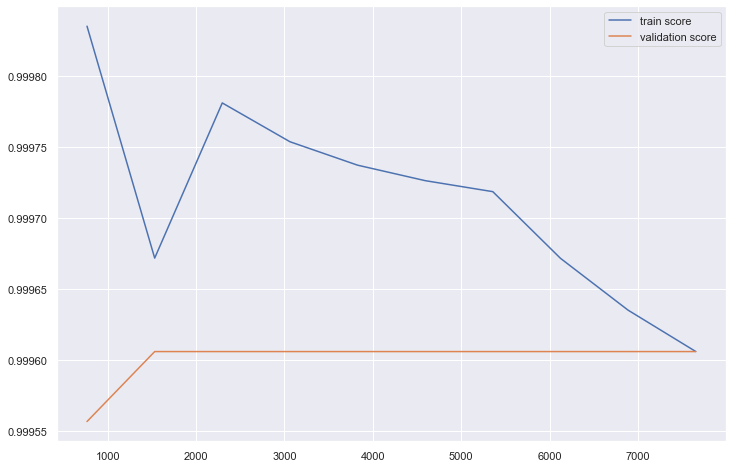

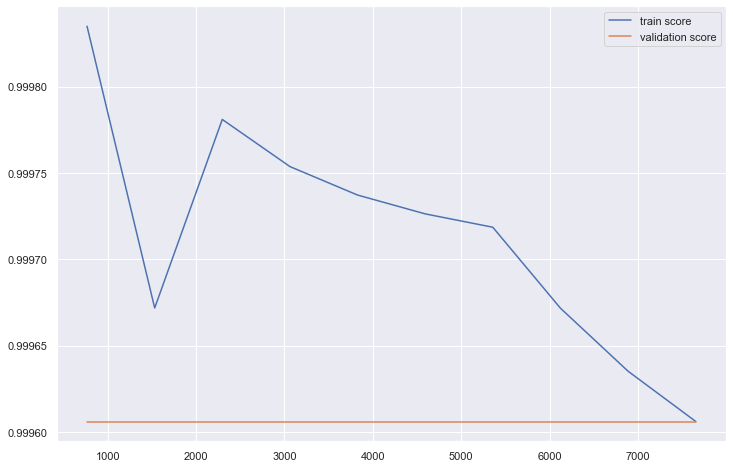

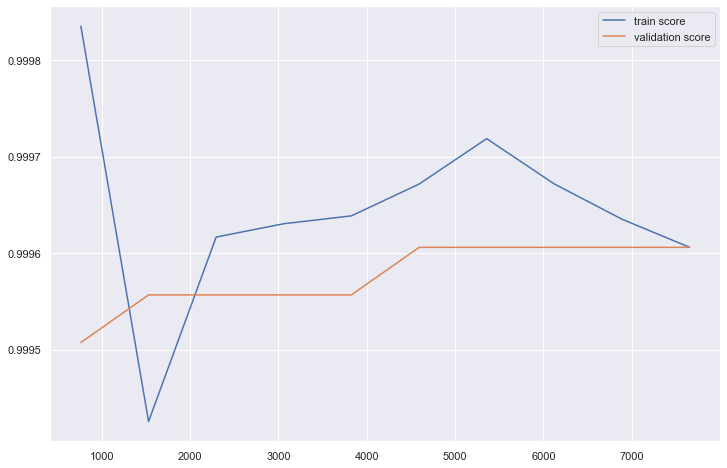

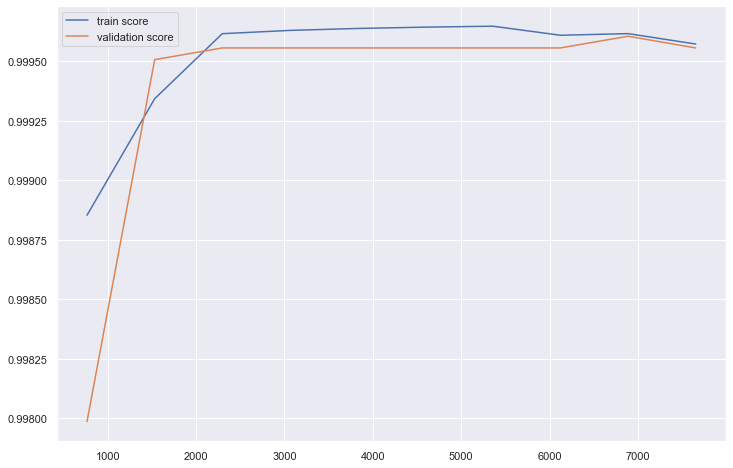

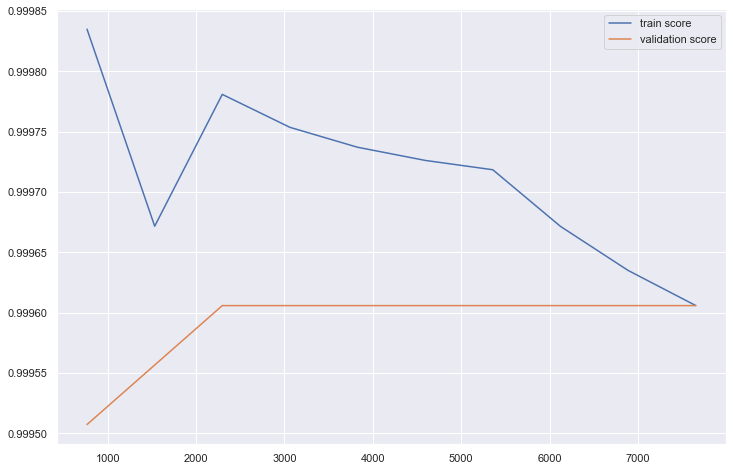

In [640]:
for name, model in dict_of_models.items():
    print("_________________________", name,"_________________________" )
    evaluation(model)

En analysant les différentes courbes de score d'apprentissage des modèles, nous observons un fiable ecart entre les scores d'apprentissage et ceux de validation. Aussi, bien que ces modèles aient des taux de précision proches de 100, on remarque que  les courbes  de score d'apprentissage des echantillon d'apprentissage et de validation ne convergent pas pour tous les modèles à l'exception du KNN. Ce qui veut dire seul le KNN n'est pas en surapprentissage. Il arrive à bien apprendre sur les données et bien prédire sur les données sur lesquelles il n'a pas appris.

Parmi ces modèles, le modele KNN est le meilleur. Nous allons par la suite l'optimiser en ajustant ces paramètres afin de rendre plus puissant et plus précis notre modèle. 


###  3.3.2 Optimisation du modèle
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

Nous estimons les différents modèles par validation croisée afin de réduire le risque de surapprentissange du modèle. Cette consiste à diviser l’échantillon d’apprentissage en n sous-groupes (n = 4 dans notre étude) et utiliser les (n-1) sous-groupes afin de classer le n ieme sous-groupe. Cette opération est réitérée en considérant d’autres sous groupes jusqu’à terminer toutes les combinaisons.

In [641]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [652]:
# Modification des paramètres de notre modèle
hyper_params = {'pipeline__polynomialfeatures__degree':[1,2],
               'pipeline__selectkbest__k': range(7, 15)}

In [653]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=100)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'pipeline__selectkbest__k': 14, 'pipeline__polynomialfeatures__degree': 1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00      2538

    accuracy                           1.00      2552
   macro avg       1.00      1.00      1.00      2552
weighted avg       1.00      1.00      1.00      2552



[[  14    0]
 [   0 2538]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00      2538

    accuracy                           1.00      2552
   macro avg       1.00      1.00      1.00      2552
weighted avg       1.00      1.00      1.00      2552



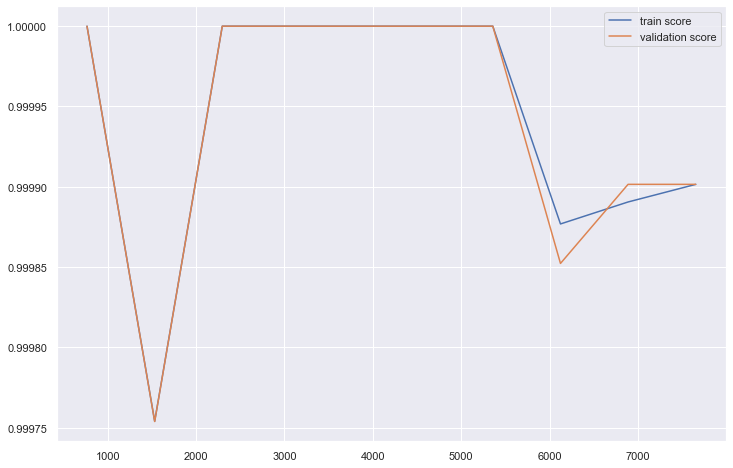

In [654]:
evaluation(grid.best_estimator_)


###  3.3.3 Précision du modèle
<div style ="border: blue solid 1px;box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 50, 50, 0.5);"><font color="black"> </font> </div>

In [655]:
from sklearn.metrics import precision_recall_curve

In [656]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

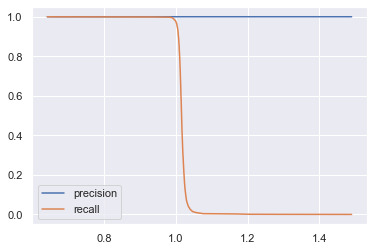

In [657]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [658]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [660]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [661]:
from sklearn.metrics import recall_score

In [662]:
f1_score(y_test, y_pred)

0.9974454706229121

In [663]:
recall_score(y_test, y_pred)

1.0

<center><div style ="border: red solid 2px; font-family: Agency FB; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);	background-color: rgba(50, 0, 0, 0.5);"><center>
<h1>FIN</h1>    
</center></div>